# PROGETTO 1 SOCIAL COMPUTING

## 1. Download Followers e Friends
Download utenti followers (api.followers) e utenti following (api.friends) di questi cinque account (i dati numerici potrebbero subire minime variazioni):
- @mizzaro - 156 Follower - 331 Following
- @damiano10 - 785 Follower - 836 Following
- @Miccighel_ - 331 Follower - 211 Following
- @eglu81 - 540 Follower - 621 Following
- @KevinRoitero - 103 Follower - 256 Following

### 1.1 Setup

Importazione delle librerie necessarie, autenticazione twitter e inizializzazione delle funzioni

In [1]:
from config import *
from pylab import rcParams
from pyvis.network import Network
from networkx.algorithms.approximation import clique
import os
import json
import pprint
import tweepy
import random
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
if(api.verify_credentials):
    print('Authentication completed succesfully!')

Authentication completed succesfully!


In [3]:
pp = pprint.PrettyPrinter()
data_folder = "data"
#caratteri per la modifica del testo in print
underline = "\033[4m"
fail = "\033[91m"
bold = "\033[1m"
endc = "\033[0m"

creators = ["Altamura Emanuele", "Lanzaro Claudio", "Mergan Samuele", "Rosso Thomas"]


def serialize_json(folder, filename, data):
    if not os.path.exists(folder):
        os.makedirs(folder, exist_ok=True)
    with open(f"{folder}/{filename}", "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
    print(f"Data serialized to path: {folder}/{filename}")

    
def read_json(path):
    if os.path.exists(path):
        with open(path, "r", encoding="utf-8") as file:
            data = json.load(file)
        print(f"Data read from path: {path}")
        return data
    else:
        print(f"No data found at path: {path}")
        return {}

def jsonAppend(json1, json2):
    json = json1 + json2
    json = list(set(json))
    return json

print("Setup Completed")

Setup Completed


### 1.2 Account da Analizzare

Salvataggio dei dati essenziali per l'analisi degli account assegnati

In [4]:
def getData(account):
    print(f"Getting ID-FollowersQuantity-FriendsQuantity of: {account}")
    json_data = api.get_user(account)._json
    data = []
    data.append(json_data['id_str'])
    data.append(json_data['followers_count'])
    data.append(json_data['friends_count'])
    data.append(json_data['protected'])
    return data

In [5]:
account_to_analyze = ["mizzaro", "damiano10", "Miccighel_", "eglu81", "KevinRoitero"]
account_to_analyze_id = []
account_to_analyze_followers_quantity = []
account_to_analyze_friends_quantity = []

for x in account_to_analyze:
    data = getData(x)
    account_to_analyze_id.append(data[0])
    account_to_analyze_followers_quantity.append(data[1])
    account_to_analyze_friends_quantity.append(data[2])
    
print(f"Account to Analyze: {account_to_analyze}")
print(f"Account to Analyze ID: {account_to_analyze_id}")
print(f"Account to Analyze Followers Quantity: {account_to_analyze_followers_quantity}")
print(f"Account to Analyze Friends Quantity: {account_to_analyze_friends_quantity}")

Getting ID-FollowersQuantity-FriendsQuantity of: mizzaro
Getting ID-FollowersQuantity-FriendsQuantity of: damiano10
Getting ID-FollowersQuantity-FriendsQuantity of: Miccighel_
Getting ID-FollowersQuantity-FriendsQuantity of: eglu81
Getting ID-FollowersQuantity-FriendsQuantity of: KevinRoitero
Account to Analyze: ['mizzaro', 'damiano10', 'Miccighel_', 'eglu81', 'KevinRoitero']
Account to Analyze ID: ['18932422', '132646210', '15750573', '19659370', '3036907250']
Account to Analyze Followers Quantity: [157, 795, 333, 541, 102]
Account to Analyze Friends Quantity: [334, 845, 212, 626, 256]


### 1.3 Salvataggio ID Followers e Friends

Salvataggio degli id dei followers e dei friends, in un file json, per ognuno dei cinque account.

In [6]:
def getFollowers(account, ids, quantity, path, save=True):
    for item in tweepy.Cursor(
            api.followers,
            id=account,
            skip_status=True,
            include_user_entities=False
    ).items(quantity):

        json_data = item._json
        found_follower = json_data["id_str"]
        
        if found_follower not in ids:
            ids.append(found_follower)
        print(f"Processing Follower #{len(ids)} of account: {account}")
    
    if(save==True): 
        serialize_json(data_folder, path, ids)
   
    print(f"Processing Followers Completed")
    

def getFriends(account, ids, quantity, path, save=True):
    
    for item in tweepy.Cursor(
            api.friends,
            id=account,
            skip_status=True,
            include_user_entities=False
    ).items(quantity):

        json_data = item._json
        found_follower = json_data["id_str"]
        
        if found_follower not in ids:
            ids.append(found_follower)
        print(f"Processing Friend #{len(ids)} of account: {account}")
    
    if(save==True): 
        serialize_json(data_folder, path, ids)
        
    print(f"Processing Friends Completed")

In [ ]:
#mizzaro
account_id = account_to_analyze_id[0]
followers_quantity = account_to_analyze_followers_quantity[0]
friends_quantity = account_to_analyze_friends_quantity[0]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, "ids"+account_to_analyze[0]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, "ids"+account_to_analyze[0]+"FriendIDs.json")

In [ ]:
#damiano10
account_id = account_to_analyze_id[1]
followers_quantity = account_to_analyze_followers_quantity[1]
friends_quantity = account_to_analyze_friends_quantity[1]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, "ids"+account_to_analyze[1]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, "ids"+account_to_analyze[1]+"FriendIDs.json")

In [ ]:
#Miccighel_
account_id = account_to_analyze_id[2]
followers_quantity = account_to_analyze_followers_quantity[2]
friends_quantity = account_to_analyze_friends_quantity[2]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, "ids"+account_to_analyze[2]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, "ids"+account_to_analyze[2]+"FriendIDs.json")

In [ ]:
#eglu81
account_id = account_to_analyze_id[3]
followers_quantity = account_to_analyze_followers_quantity[3]
friends_quantity = account_to_analyze_friends_quantity[3]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, "ids"+account_to_analyze[3]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, "ids"+account_to_analyze[3]+"FriendIDs.json")

In [ ]:
#KevinRoitero
account_id = account_to_analyze_id[4]
followers_quantity = account_to_analyze_followers_quantity[4]
friends_quantity = account_to_analyze_friends_quantity[4]
account_ids = []
getFollowers(account_id, account_ids, followers_quantity, "ids"+account_to_analyze[4]+"FollowerIDs.json")
account_ids = []
getFriends(account_id, account_ids, friends_quantity, "ids"+account_to_analyze[4]+"FriendIDs.json")

Versione alternativa con un unico ciclo

In [ ]:
#Versione con un unico ciclo 
for x in range(len(account_to_analyze)):
    account_id = account_to_analyze_id[x]
    followers_quantity = account_to_analyze_followers_quantity[x]
    friends_quantity = account_to_analyze_friends_quantity[x]
    account_ids = []
    getFollowers(account_id, account_ids, followers_quantity, "ids"+account_to_analyze[x]+"FollowerIDs.json")
    account_ids = []
    getFriends(account_id, account_ids, friends_quantity, "ids"+account_to_analyze[x]+"FriendIDs.json")

Versione alternativa per salvare direttamente gli archi tra i nodi con l'inserimento di un timer per evitare timeout.

In [ ]:
import datetime
def getFollowers(id_str):     # prendo i dati di tutti i followerr di id_str e aggiungo il fatto che id_str è seguito da account 
    x=1                     #Returns a cursored collection of user objects for users following the specified user.
    for item in tweepy.Cursor(
            api.followers,
            user_id=id_str,
            skip_status=True,
            include_user_entities=False
    ).items(quantity):
        json_data = item._json
        dataFrameAppend({'source':json_data['id_str'],'target':id_str},path_csv_edges)
        addUserDataToCsv(json_data['id_str'],path_csv_nodes)
        print("Ho aggiunto :", json_data['screen_name'], ' numero ',x)
        x=x+1
        if(x==300)or(x==599):
            print("Asp! 12 min da: ",  datetime.datetime.now().strftime(" %H:%M:%S"))
            time.sleep(720)
def getFriends(id_str):     # prendo i dati di tutti i followerr di id_str e aggiungo il fatto che id_str segue da account
    x=1
    for item in tweepy.Cursor(
            api.friends,
            user_id=id_str,
            skip_status=True,
            include_user_entities=False
    ).items(quantity):
        
        json_data = item._json
        dataFrameAppend({'source':id_str,'target':json_data['id_str']},path_csv_edges)
        addUserDataToCsv(json_data['id_str'],path_csv_nodes)   
        print("Ho aggiunto :", json_data['screen_name'], ' numero ',x)
        x=x+1   
        if(x==300)or(x==599):
            print("Asp! 12 min da: ",  datetime.datetime.now().strftime(" %H:%M:%S"))
            time.sleep(720)

## 2. Followers dei Followers
Selezione di 5 utenti followers a caso tra quelli di ciascuno dei cinque account e salvataggio di ulteriori 10 utenti followers (followers dei followers).

### 2.1 Cinque Followers Random

In [7]:
def randomizeFollower(read_path, ids):
    print(f"Getting Randomized Followers from {read_path}")
    data_account = read_json(read_path)
    for x in range(5):
        randomizeFollowerRec(data_account, ids)

def randomizeFollowerRec(data_ids, ids):
    rand = random.choice(data_ids)
    user_data = getData(rand)
    if(rand in ids):
        randomizeFollowerRec(data_ids, ids)
    elif(user_data[3]):
        randomizeFollowerRec(data_ids, ids)
    elif(user_data[1] <=10):
        randomizeFollowerRec(data_ids, ids)
    else:
        ids.append(rand)

Randomizzazione di 25 follower totali, 5 per ogni account iniziale

In [ ]:
follower_ids = []
for x in account_to_analyze:
    randomizeFollower("data/ids"+x+"FollowerIDs.json", follower_ids)

print(f"{len(follower_ids)} Followers of Followers: {follower_ids}")

### 2.2 Dieci Followers dei Followers
Salvataggio degli ID di 10 Followers per ognuno dei Follower ottenuti precedentemente

In [ ]:
account_ids = []
for x in follower_ids:
    getFollowers(x, account_ids, 10, "ids/FollowerOfFollowerIDs.json", False)

serialize_json(data_folder, "ids/FollowerOfFollowerIDs.json", account_ids)

## 3 Friends dei Friends

Selezione di 5 utenti following a caso tra quelli di ciascuno dei cinque account e salvataggio di ulteriori 10 utenti following (following dei following).


### 3.1 Cinque Friends Random

In [8]:
def randomizeFriend(read_path, ids):
    print(f"Getting Randomized Friends from {read_path}")
    data_account = read_json(read_path)
    for x in range(5):
        randomizeFriendRec(data_account, ids)

def randomizeFriendRec(data_ids, ids):
    rand = random.choice(data_ids)
    user_data = getData(rand)
    if(rand in ids):
        randomizeFriendRec(data_ids, ids)
    elif(user_data[3]):
        randomizeFriendRec(data_ids, ids)
    elif(user_data[2] <=10):
        randomizeFriendRec(data_ids, ids)
    else:
        ids.append(rand)

Randomizzazione di 25 friend totali, 5 per ogni account iniziale

In [ ]:
friend_ids = []
#randomizzazione di 25 friends totali
for x in account_to_analyze:
    randomizeFriend("data/ids/"+x+"FriendIDs.json", friend_ids)

print(f"{len(friend_ids)} Friends of Friends: {friend_ids}")

### 3.2 Dieci Friends dei Friends

Salvataggio degli ID di 10 Friend dei Friend

In [ ]:
account_ids = []
for x in friend_ids:
    getFriends(x, account_ids, 10, "ids/FriendOfFriendIDs.json", False)

serialize_json(data_folder, "ids/FriendOfFriendIDs.json", account_ids)

### 3.3 Salvataggio di tutti gli ID in un unico file

In [ ]:
all_ids = []

# aggiunta id account iniziali
for x in account_to_analyze_id:
    all_ids.append(x)
print(f"Total Account IDs: {len(all_ids)}")

# aggiunta id followers of followers e friends of friends
all_ids = jsonAppend(all_ids, read_json("data/ids/FriendOfFriendIDs.json"))
all_ids = jsonAppend(all_ids, read_json("data/ids/FollowerOfFollowerIDs.json"))
print(f"Total Account IDs: {len(all_ids)}")

# aggiunta id di followers e friends degli account iniziali
for x in account_to_analyze:
    all_ids = jsonAppend(all_ids, read_json("data/ids/"+x+"FollowerIDs.json"))
    all_ids = jsonAppend(all_ids, read_json("data/ids/"+x+"FriendIDs.json"))
print(f"Total Account IDs: {len(all_ids)}")

#salvataggio di tutti gli id
serialize_json(data_folder, "ids/AllIDs.json", all_ids)

## 4. Dettagli Profili
Download dei dettagli del profilo di tutti gli utenti recuperati


In [11]:
def dataFrameAppend(path, data):
    dataframe = createDataFrame(data)
    dataframe.to_csv(path, mode='a', header=False, index=False)
    
def createDataFrame(data):
    json_normalized = pd.json_normalize(data)
    dataframe = pd.DataFrame(json_normalized)
    return dataframe

### 4.1 Salvataggio Dettagli Profili

Salvataggio dei dati ottenuti dalla funzione *get_user* in un file csv chiamato "all_nodes.csv"

In [12]:
def getUserData(all_ids):
    all_user_data = []
    for x in all_ids:
        print(f"Processing data of account: {x}")
        try:
            user_data = api.get_user(x)._json
            all_user_data.append(user_data)
        except:
            print(f"{fail}{bold}Error with account: {x}{endc}")
    return all_user_data

In [ ]:
path = "data/all_nodes.csv"
all_ids = read_json("data/ids/AllIDs.json")
nodes_data = getUserData(all_ids)
createDataFrame(nodes_data).to_csv(path, index=False)
print(f"Processing Completed and Data Saved")

### 4.2 Salvataggio Archi (friendship)

Controllo sul tipo di amicizia, tra gli account iniziali e tutti gli account ottenuti precedentemente, e salvataggio degli archi in un file csv.

Notazione CSV: source follows target

In questa fase è stato notato che l'account **1319272146963673089 è stato eliminato da Twitter**.

In [13]:
def checkFriendship(source, target, path):
    print(f"Processing Friendship Between {source} and {target}")
    try:
        friendship = api.show_friendship(source_id=source, target_id=target)  
        if friendship[0].following == True :
            data = {}
            data['source'] = source
            data['target'] = target
            dataFrameAppend(path, data)
            print(f"{source} follows {target}")
        if friendship[0].followed_by == True :
            data = {}
            data['source'] = target
            data['target'] = source
            dataFrameAppend(path, data)  
            print(f"{target} follows {source}")
    except:
        print(f"{fail}{bold}Error with account: {target}{endc}")

In [ ]:
all_nodes = read_json("data/ids/AllIDs.json")
path = "data/all_edges.csv"
columns = ["source", "target"]
pd.DataFrame(columns=columns).to_csv(path, index=False)

Salvataggio degli archi tra gli account iniziali e gli account ottenuti

In [ ]:
#mizzaro
for x in all_nodes:
    checkFriendship(account_to_analyze_id[0], x, path)
print(f"Processing Completed!")

In [ ]:
#damiano10
for x in all_nodes:
    checkFriendship(account_to_analyze_id[1], x, path)
print(f"Processing Completed!")

In [ ]:
#Miccighel_
for x in all_nodes:
    checkFriendship(account_to_analyze_id[2], x, path)
print(f"Processing Completed!")

In [ ]:
#eglu81
for x in all_nodes:
    checkFriendship(account_to_analyze_id[3], x, path)
print(f"Processing Completed!")

In [ ]:
#KevinRoitero
for x in all_nodes:
    checkFriendship(account_to_analyze_id[4], x, path)
print(f"Processing Completed!")

In [ ]:
# versione con un ciclo
for x in all_nodes:
    checkFriendship(account_to_analyze_id[0], x, path)
    checkFriendship(account_to_analyze_id[1], x, path)
    checkFriendship(account_to_analyze_id[2], x, path)
    checkFriendship(account_to_analyze_id[3], x, path)
    checkFriendship(account_to_analyze_id[4], x, path)

# versione alternativa con due cicli
for x in account_to_analyze_id:
    for y in all_nodes:
        checkFriendship(x, y, path)

#ACCOUNT CHE NON ESISTE PIù "1319272146963673089"

Eliminazione di eventuali righe duplicate

In [ ]:
path = "data/all_edges.csv"
df = pd.read_csv(path)
print(len(df))
df.drop_duplicates(keep = "first", inplace = True)
df.to_csv(path, index=False)
print(len(df))

## 5. Costruzione Rete Sociale
Costruzione della rete sociale (grafo):
- Inserimento dell’id di ciascun utente come identificatore del nodo
- Rappresentazione di ogni arco come una relazione follows tra due utenti
- Inserimento dei dettagli del profilo di ciascun utente come attributi del nodo
- Inserimento dei membri del nostro gruppo come attributi del grafo
- Inserimento per ogni nodo, un attributo con il numero di follower individuati, un attributo con il numero di friends ed un attributo con tutti i dati ottenuti

In [15]:
def createDiGraph(nodes_path, edges_path):
    nodes_df = pd.read_csv(nodes_path)
    edges_df = pd.read_csv(edges_path)
    graph = nx.DiGraph(creators=creators)
    for index, row in nodes_df.iterrows():
        #print(type(row['id']))
        attributes = nodes_df.iloc[index].to_dict()
        node = int(row['id'])
        graph.add_node(node,
                       screen_name = row['screen_name'],
                       location = row['location'],
                       description = row['description'],
                       friends_count = row['friends_count'],
                       followers_count = row['followers_count'],
                       favourites_count = row['favourites_count'],
                       statuses_count = row['statuses_count'],
                       verified = row['verified']
                      )
    for index, row in edges_df.iterrows():
        a = int(row['source'])
        b = int(row['target'])
        graph.add_edge(a,
                       b, 
                       #friendhip = "follows" NON NECESSARIA
                      )
    return graph

In [16]:
complete_graph = createDiGraph("data/all_nodes.csv", "data/all_edges.csv")
nx.write_gpickle(complete_graph, "data/graphs/complete_graph.pkl")

In [17]:
print(f"Graph Attributes: {complete_graph.graph}")

Graph Attributes: {'creators': ['Altamura Emanuele', 'Lanzaro Claudio', 'Mergan Samuele', 'Rosso Thomas']}


In [ ]:
print(f"Nodes Data: {complete_graph.nodes().data()}")

In [ ]:
print(f"Edges Data: {complete_graph.edges().data()}")

### 5.1 Visualizzazione Rete Sociale

In [26]:
def drawGraph(graph, save_path, title="Graph"):
    rcParams['figure.figsize'] = 20, 20
    nx.draw_networkx(
        graph,
        pos = nx.spring_layout(graph),
        node_color = '#9d12b5',
        width = 2,
        edge_cmap = plt.cm.Blues,
        with_labels = True,
        arrows=True
    )
    plt.savefig(save_path)
    plt.show()

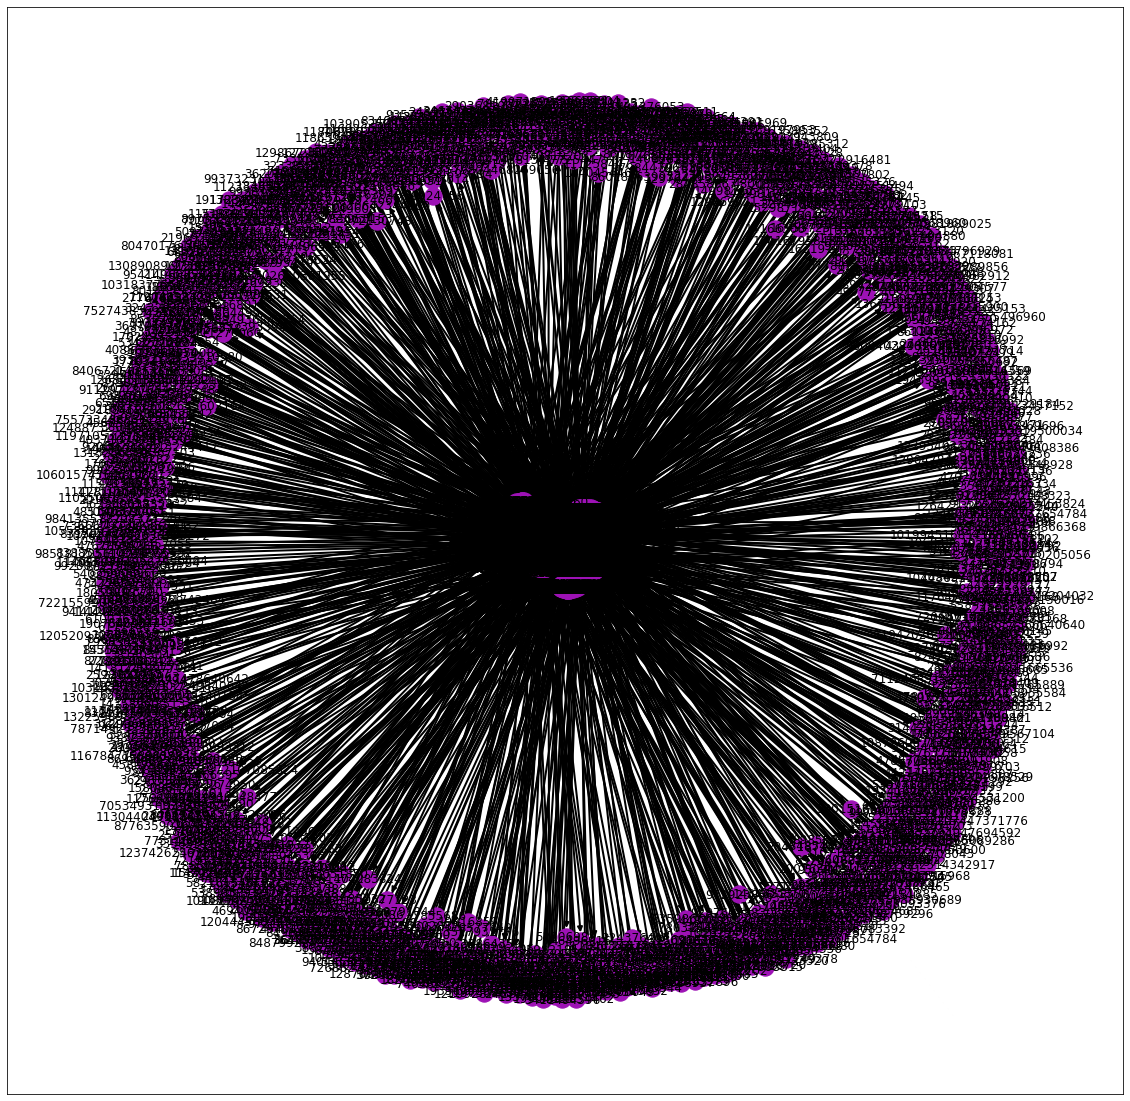

In [27]:
graph = nx.read_gpickle("data/graphs/complete_graph.pkl")
drawGraph(graph, "data/graphs/complete_graph.pdf", "Complete Directed Graph")

## 6. Visualizzazione Rete (Pyvis)
Producete una visualizzazione interattiva del grafo usando pyvis

In [28]:
def drawGraphPyvis(graph, save_path, heading="Graph", directed=True):
    ntGraph = Network(
        height="100%", 
        width="100%", 
        bgcolor="#222222", 
        font_color="white",
        heading=heading,
        directed=directed
    )
    ntGraph.show_buttons()
    ntGraph.barnes_hut()
    ntGraph.from_nx(graph)
    neighbor_map = ntGraph.get_adj_list()
    ntGraph.show(save_path)

In [29]:
graph = nx.read_gpickle("data/graphs/complete_graph.pkl")

print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

drawGraphPyvis(graph, save_path="data/graphs/complete_graph.html", heading="Complete Directed Graph")

Number of nodes: 3124
Number of edges: 4161


Eliminazione dei nodi isolati dato che molti follower dei follower e friend dei friend non sono seguiti dai 5 account iniziali.

In [30]:
def removeIsolates(graph):
    graph_no_isolates = graph
    graph_no_isolates.remove_nodes_from(list(nx.isolates(graph_no_isolates)))
    return graph_no_isolates

In [31]:
complete_graph_no_isolates = nx.read_gpickle("data/graphs/complete_graph.pkl")
complete_graph_no_isolates = removeIsolates(complete_graph_no_isolates)
nx.write_gpickle(complete_graph_no_isolates, "data/graphs/complete_graph_no_isolates.pkl")
drawGraphPyvis(complete_graph_no_isolates, save_path="data/graphs/complete_graph_no_isolates.html", heading="Complete Directed Graph")

## 7. Verifiche sulla Rete Sociale
Verifica se il grafo:
- è connesso (is_connected)
- è bipartito (is_bipartite)

La funzione *is_connected* funziona solo per i grafi non orientati e visto che il nostro grafo è orientato, è stato deciso di trovare le componenti debolmente e fortemente connesse.

In [32]:
def isConnected(graph):
    if nx.is_connected(graph) == True:
        print("Il grafo è connesso")
    else:
        print("Il grafo NON è connesso")

def isWeaklyConnected(graph):
    connected_components = nx.number_weakly_connected_components(graph)
    if nx.is_weakly_connected(graph) == True:
        print(f"Il grafo è debolmente connesso")
        print(f"Componenti debolmente connesse: {connected_components}")
    else:
        print(f"Il grafo NON è debolmente connesso")
        print(f"Componenti debolmente connesse: {connected_components}")

def isStronglyConnected(graph):
    connected_components = nx.number_strongly_connected_components(graph)
    if nx.is_strongly_connected(graph) == True:
        print(f"Il grafo è fortemente connesso")
        print(f"Componenti fortemente connesse: {connected_components}")
    else:
        print(f"Il grafo NON è fortemente connesso")
        print(f"Componenti fortemente connesse: {connected_components}")
        
def isBipartite(graph):
    if nx.is_bipartite(graph) == True:
        print("Il grafo è bipartito")
    else:
        print("Il grafo NON è bipartito")

# restituisce una lista di liste di nodi che formano le componenti fortemente connesse    
# strong_components = nx.strongly_connected_components(graph) 

In [34]:
graph = nx.read_gpickle("data/graphs/complete_graph_no_isolates.pkl")
isBipartite(graph)
isWeaklyConnected(graph)
isStronglyConnected(graph)

Il grafo NON è bipartito
Il grafo è debolmente connesso
Componenti debolmente connesse: 1
Il grafo NON è fortemente connesso
Componenti fortemente connesse: 1975


## 8. Distanze del grafo
Misurazione dell seguenti distanze sul grafo:
- Centro (center)
- Diametro (diameter)
- Raggio (radius)

Per misurare le distanze è necessario avere un grafo connesso (o una componenente fortemente connessa)

**FORTEMENTE CONNESSO:** Ogni nodo deve avere almeno in-degree e out-degree pari a 1. Per rendere un grafo fortemente connesso, ogni nodo deve avere almeno un arco in entrata ed uno in uscita.

### 8.1 Trasformazione Grafo Orientato in Non Orientato

Trasformazione del grafo ottenuto precedentemente in indiretto, settando reciprocal=False (crea gli archi anche se non si seguono a vicenda) ed infine eliminazione dei nodi isolati.

In [35]:
graph = nx.read_gpickle("data/graphs/complete_graph_no_isolates.pkl")
complete_undirected_graph = graph.to_undirected(reciprocal=False)
complete_undirected_graph = removeIsolates(complete_undirected_graph)
nx.write_gpickle(complete_undirected_graph, "data/graphs/complete_undirected_graph.pkl")

### 8.2 Visualizzazione del nuovo Grafo Non Orientato

In [36]:
complete_undirected_graph = nx.read_gpickle("data/graphs/complete_undirected_graph.pkl")

In [37]:
print(f"Number of nodes: {complete_undirected_graph.number_of_nodes()}")
print(f"Number of edges: {complete_undirected_graph.number_of_edges()}")

Number of nodes: 2709
Number of edges: 3312


In [38]:
drawGraphPyvis(complete_undirected_graph, "data/graphs/complete_undirected_graph.html", "Complete Undirected Graph", False)

Verifica se è connesso

In [39]:
isConnected(complete_undirected_graph)

Il grafo è connesso


### 8.3 Centro

In [40]:
center = nx.center(complete_undirected_graph)
print(f"Graph Center: {center[0]}")

Graph Center: 19659370


### 8.4 Raggio

In [41]:
radius = nx.radius(complete_undirected_graph)
print(f"Graph Radius: {radius}")

Graph Radius: 2


### 8.5 Diametro

In [42]:
diameter = nx.diameter(complete_undirected_graph)
print(f"Graph Diameter: {diameter}")

Graph Diameter: 4


## 9. Centralità
Calcolo, salvataggio in file csv e visualizzazione delle seguenti misure di centralità sul grafo:
- Betweenness centrality (betweenness_centrality)
- Closeness centrality (closeness_centrality)
- Degree centrality (degree_centrality)
- In-degree centrality (in_degree_centrality)
- Out-degree centrality (out_degree_centrality)
- Page Rank (pagerank)
- HITS (hits)

In [62]:
def draw(G, pos, measures, measure_name, save_path):
    rcParams['figure.figsize'] = 30, 30
    nodes = nx.draw_networkx_nodes(G, pos, 
                                   node_size=150, 
                                   cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys()
                                  )
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.savefig(save_path)
    plt.show() 

In [63]:
complete_graph_no_isolates = nx.read_gpickle("data/graphs/complete_graph_no_isolates.pkl")
complete_undirected_graph = nx.read_gpickle("data/graphs/complete_undirected_graph.pkl")

### 9.1 Betweenness Centrality

In [64]:
path = "data/centralities/betweenness_centrality.csv"
data = nx.betweenness_centrality(complete_graph_no_isolates, normalized=True)
df = pd.DataFrame(list(data.items()), columns = ['id','Betweenness Centrality'])
df.to_csv(path, index=False)
print(f"Processing Completed and Data Saved")

Processing Completed and Data Saved


In [65]:
df.sort_values("Betweenness Centrality", ascending=False)

id  Betweenness Centrality
1140            132646210                0.262752
28               19659370                0.186273
1056             15750573                0.114854
810              18932422                0.053614
502            3036907250                0.047944
...                   ...                     ...
911   1232460508160094209                0.000000
912            2309104237                0.000000
913              40576466                0.000000
914             115180931                0.000000
2708           2269512362                0.000000

[2709 rows x 2 columns]

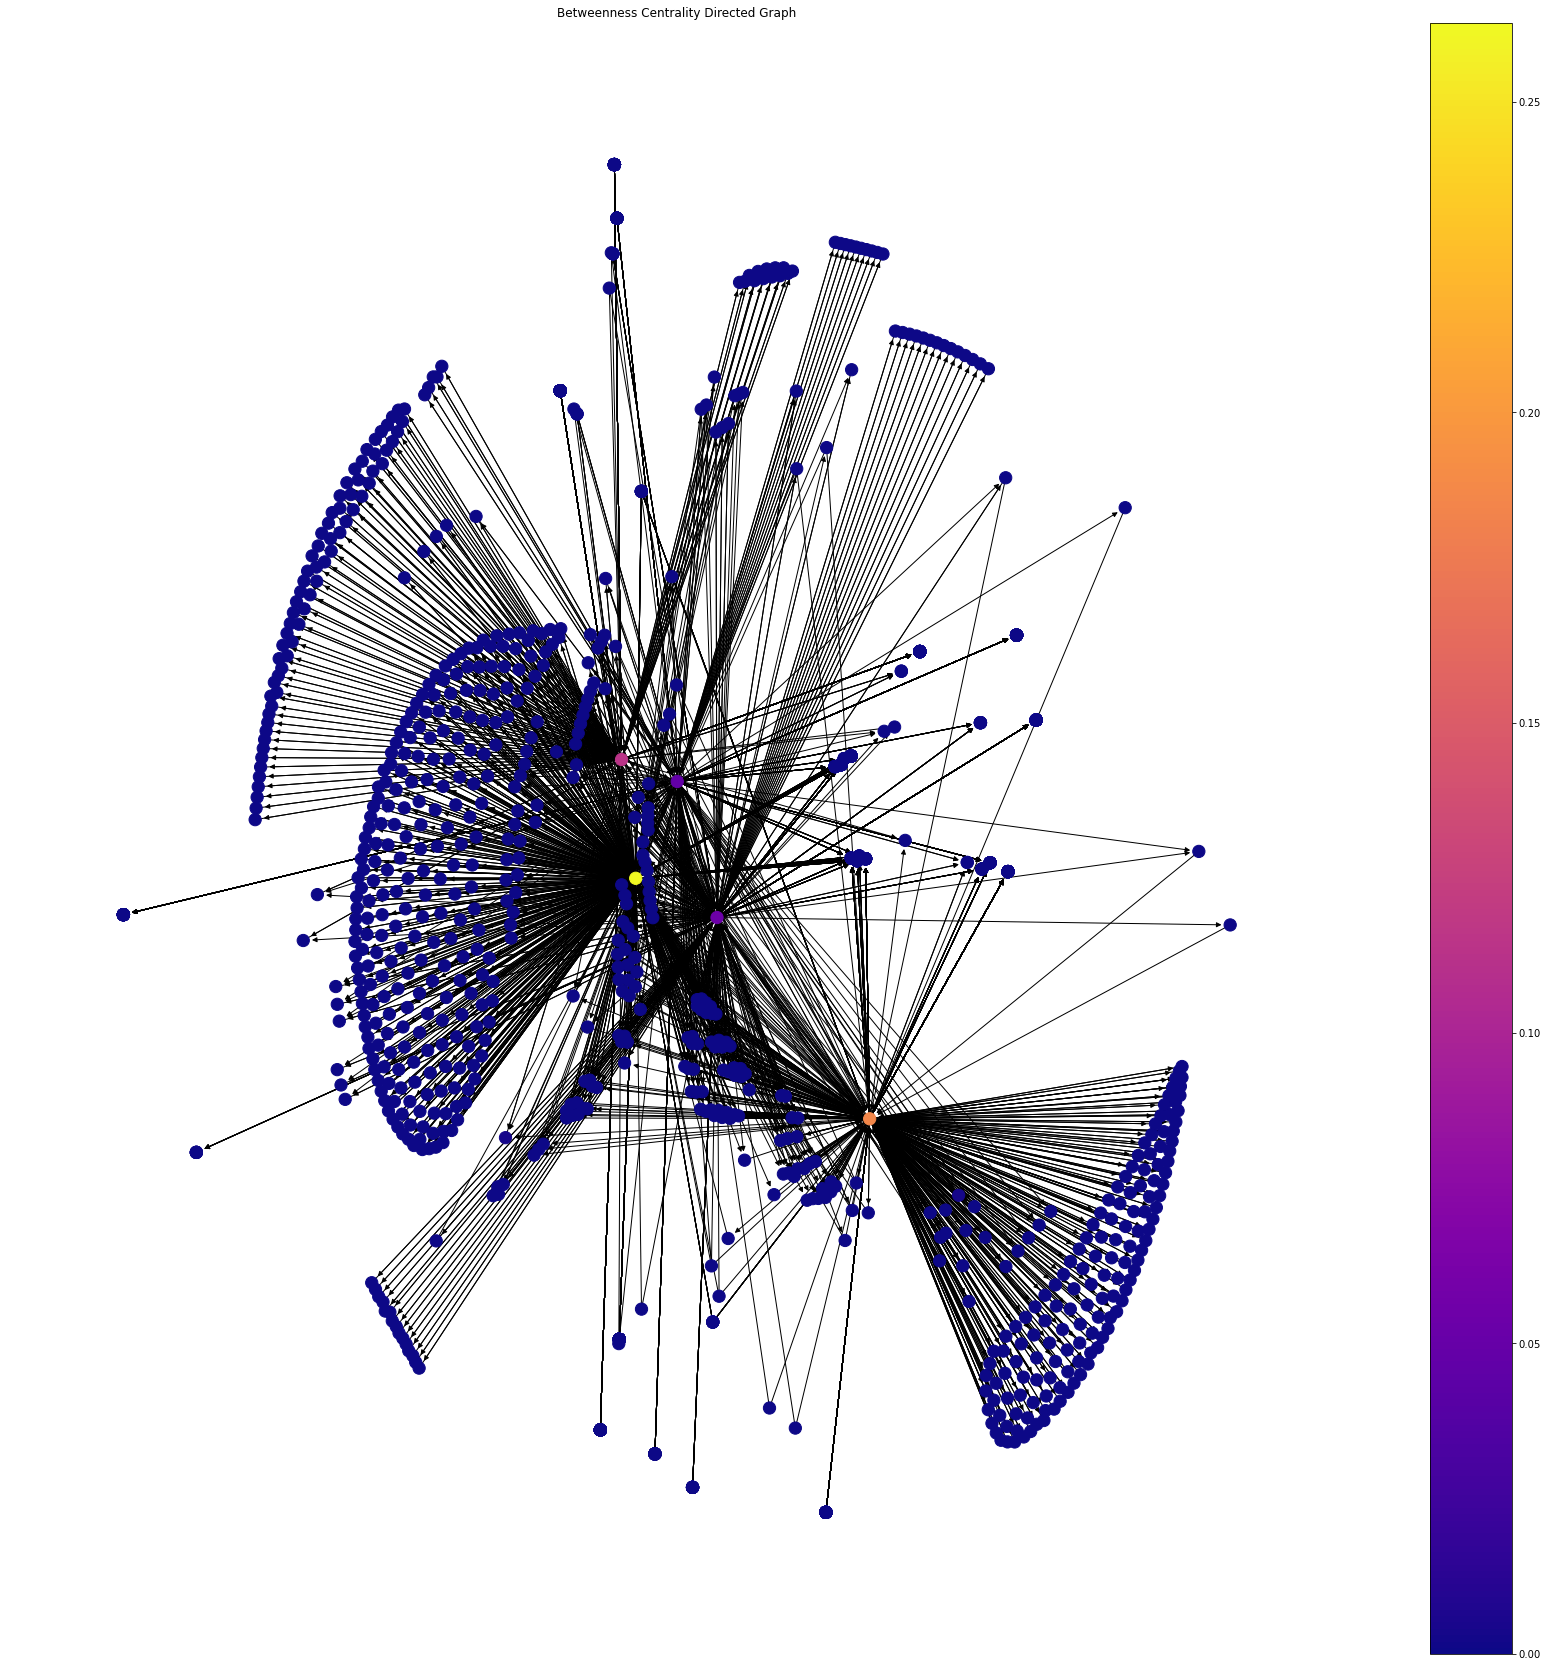

In [66]:
draw(
    complete_graph_no_isolates,
    nx.kamada_kawai_layout(complete_graph_no_isolates),
    data,
    "Betweenness Centrality Directed Graph",
    "data/centralities/betweenness_centrality_graph.pdf"
)

### 9.2 CLOSENESS CENTRALITY

In [67]:
path = "data/centralities/closeness_centrality.csv"
data = nx.closeness_centrality(complete_graph_no_isolates)
df = pd.DataFrame(list(data.items()), columns = ['id','Closeness Centrality'])
df.to_csv(path, index=False)
print(f"Processing Completed and Data Saved")

Processing Completed and Data Saved


In [68]:
df.sort_values("Closeness Centrality", ascending=False)

id  Closeness Centrality
1140            132646210              0.403751
28               19659370              0.368261
2059  1111315973125169152              0.303464
1056             15750573              0.294819
810              18932422              0.294567
...                   ...                   ...
777             109399833              0.000000
1841           2877269332              0.000000
1842             70422392              0.000000
1843             85428593              0.000000
2708           2269512362              0.000000

[2709 rows x 2 columns]

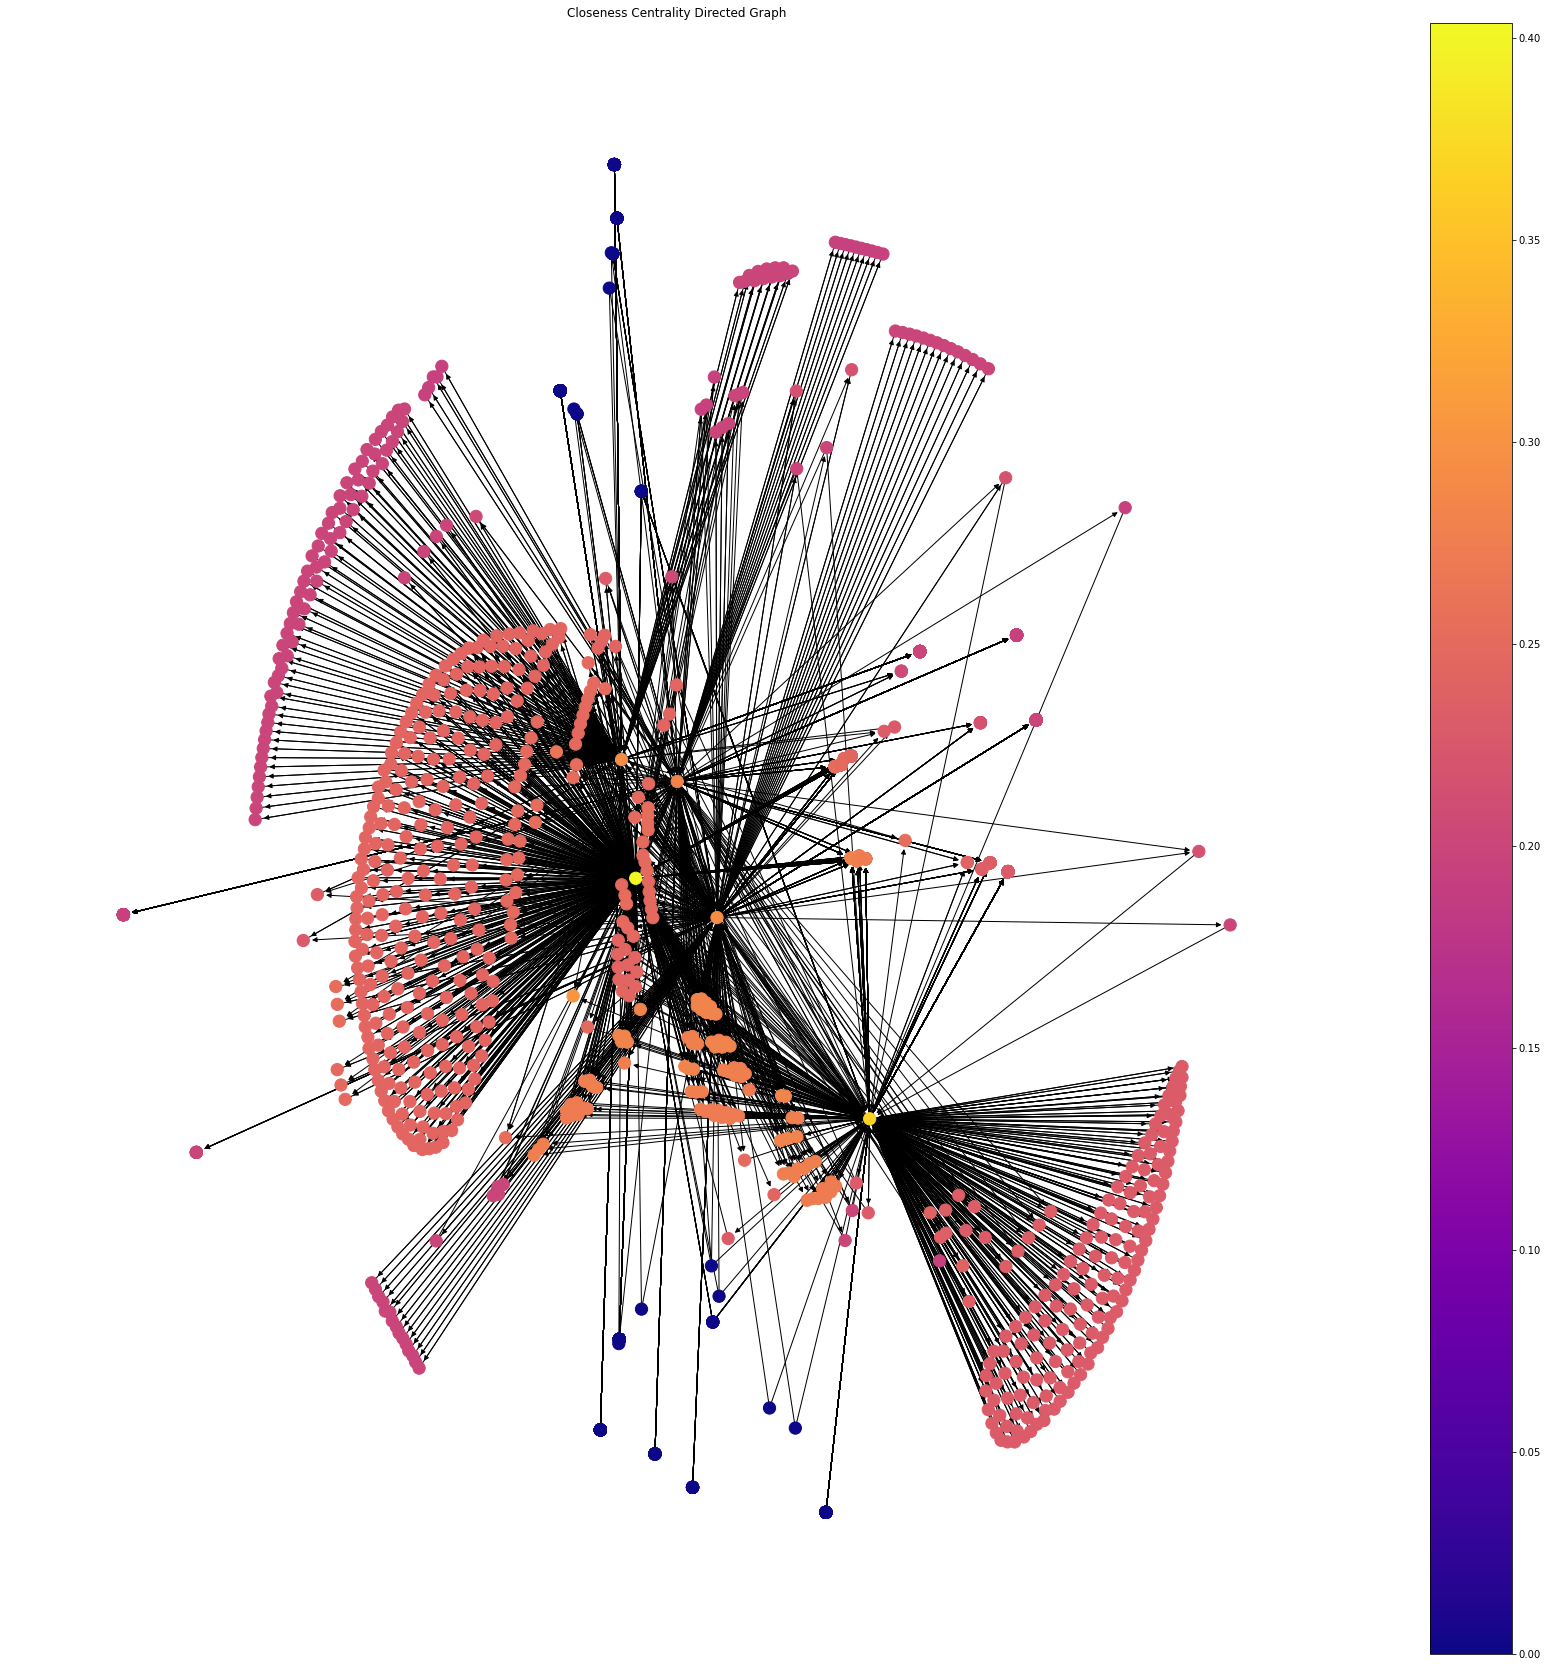

In [69]:
draw(
    complete_graph_no_isolates,
    nx.kamada_kawai_layout(complete_graph_no_isolates),
    data,
    "Closeness Centrality Directed Graph",
    "data/centralities/closeness_centrality_graph.pdf"
)

### 9.3 Degree Centrality

In [70]:
path = "data/centralities/degree_centrality.csv"
data = nx.degree_centrality(complete_graph_no_isolates)
df = pd.DataFrame(list(data.items()), columns = ['id','Degree Centrality'])
df.to_csv(path, index=False)
print(f"Processing Completed and Data Saved")

Processing Completed and Data Saved


In [71]:
df.sort_values("Degree Centrality", ascending=False)

id  Degree Centrality
1140           132646210           0.599335
28              19659370           0.428730
1056            15750573           0.201256
810             18932422           0.180576
502           3036907250           0.132570
...                  ...                ...
1414  920563781616496641           0.000369
1413            19073790           0.000369
1412                8943           0.000369
1410            15637569           0.000369
2708          2269512362           0.000369

[2709 rows x 2 columns]

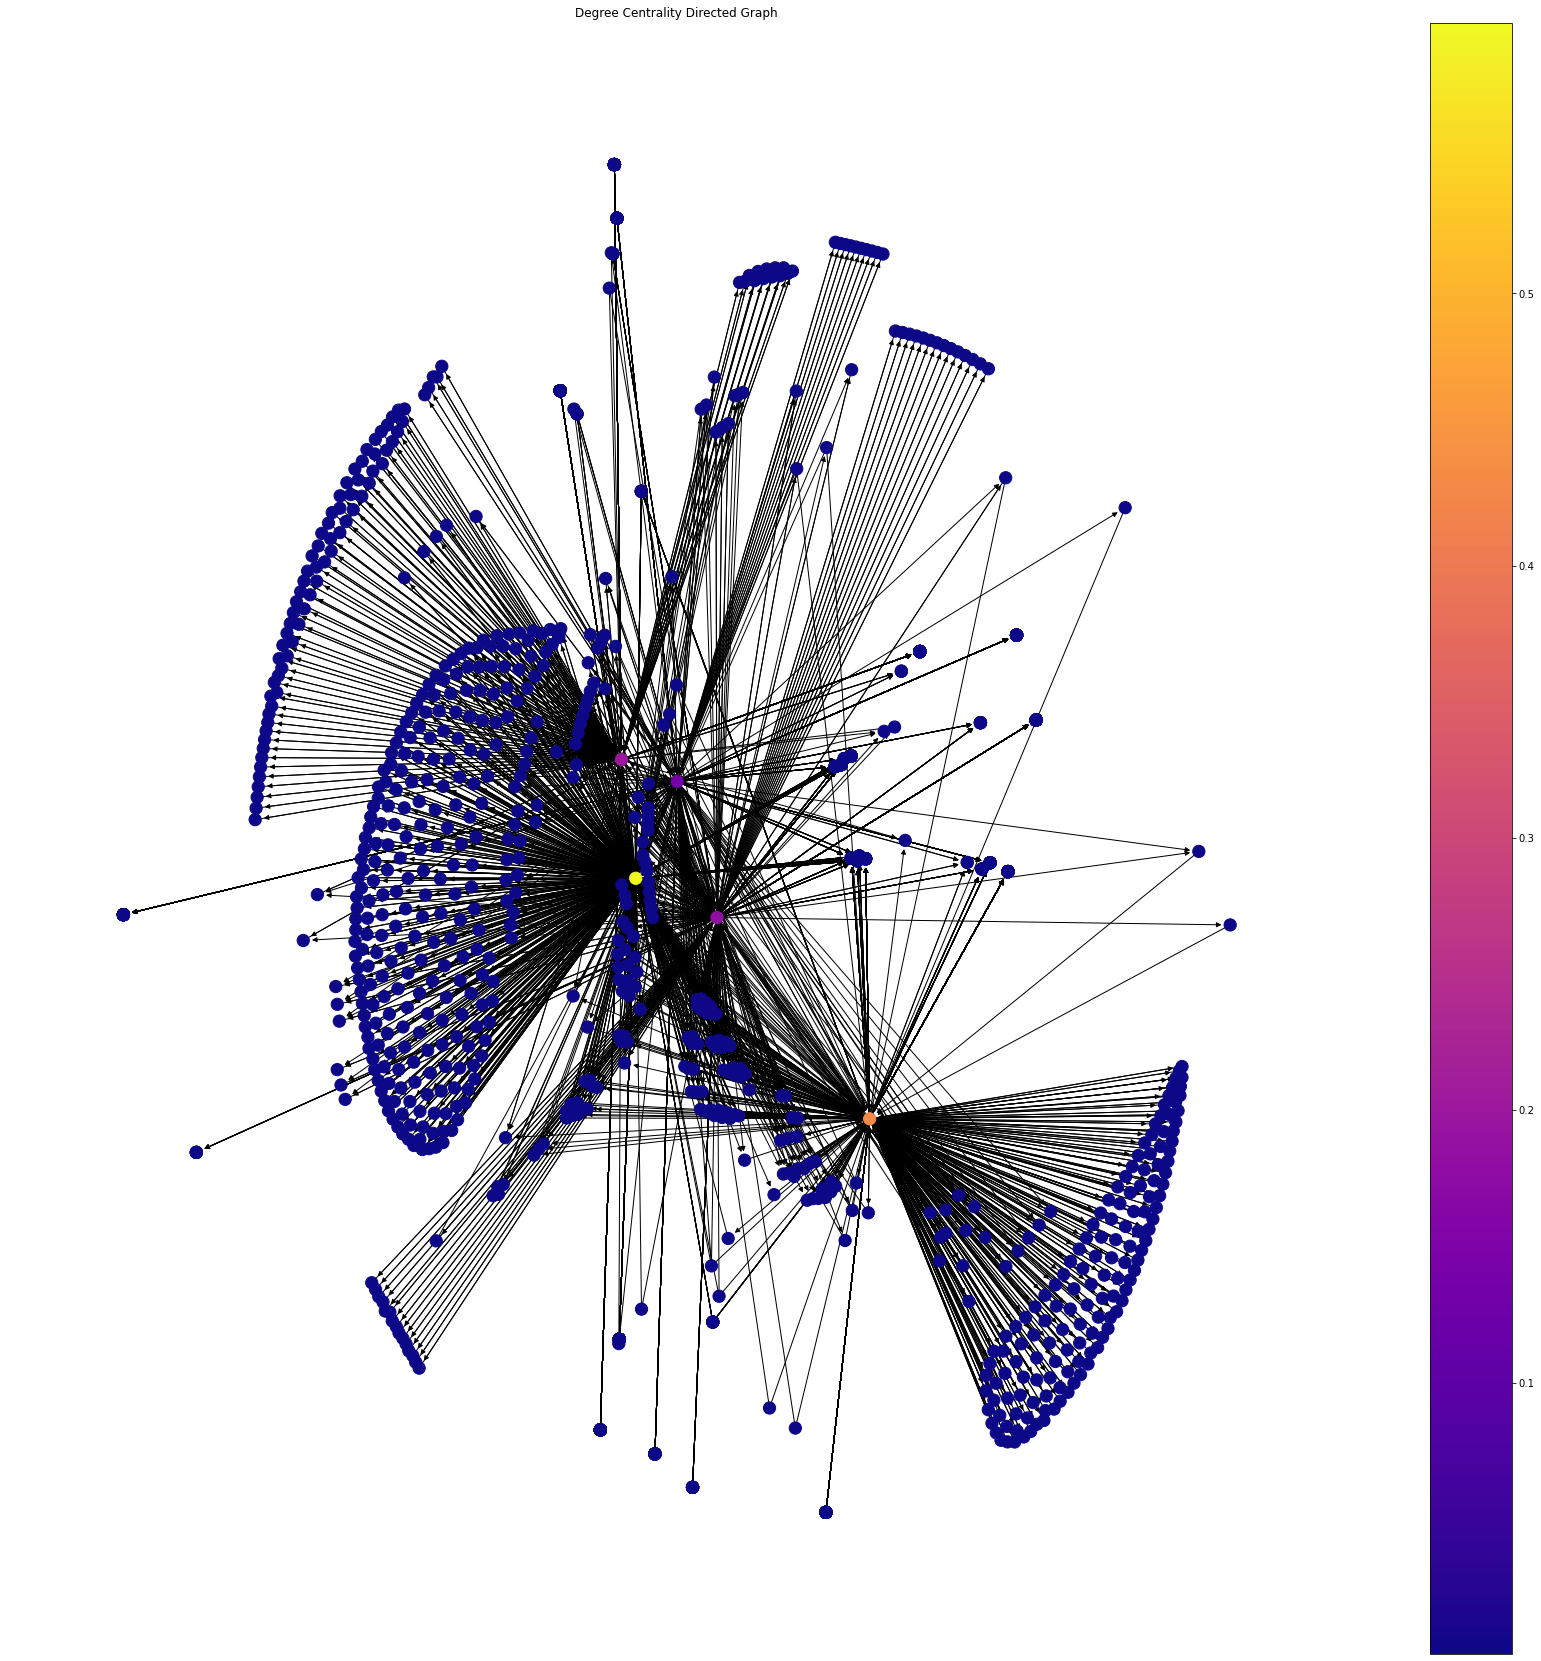

In [72]:
draw(
    complete_graph_no_isolates,
    nx.kamada_kawai_layout(complete_graph_no_isolates),
    data,
    "Degree Centrality Directed Graph",
    "data/centralities/degree_centrality_graph.pdf"
)

### 9.4 In-Degree Centrality

In [73]:
path = "data/centralities/indegree_centrality.csv"
data = nx.in_degree_centrality(complete_graph_no_isolates)
df = pd.DataFrame(list(data.items()), columns = ['id','Indegree Centrality'])
df.to_csv(path, index=False)
print(f"Processing Completed and Data Saved")

Processing Completed and Data Saved


In [74]:
df.sort_values("Indegree Centrality", ascending=False)

id  Indegree Centrality
1140           132646210             0.289882
28              19659370             0.198671
1056            15750573             0.122969
810             18932422             0.058346
502           3036907250             0.038035
...                  ...                  ...
524   774324193928351744             0.000000
523   838131126002728960             0.000000
2009           443602279             0.000000
2012            16739331             0.000000
2708          2269512362             0.000000

[2709 rows x 2 columns]

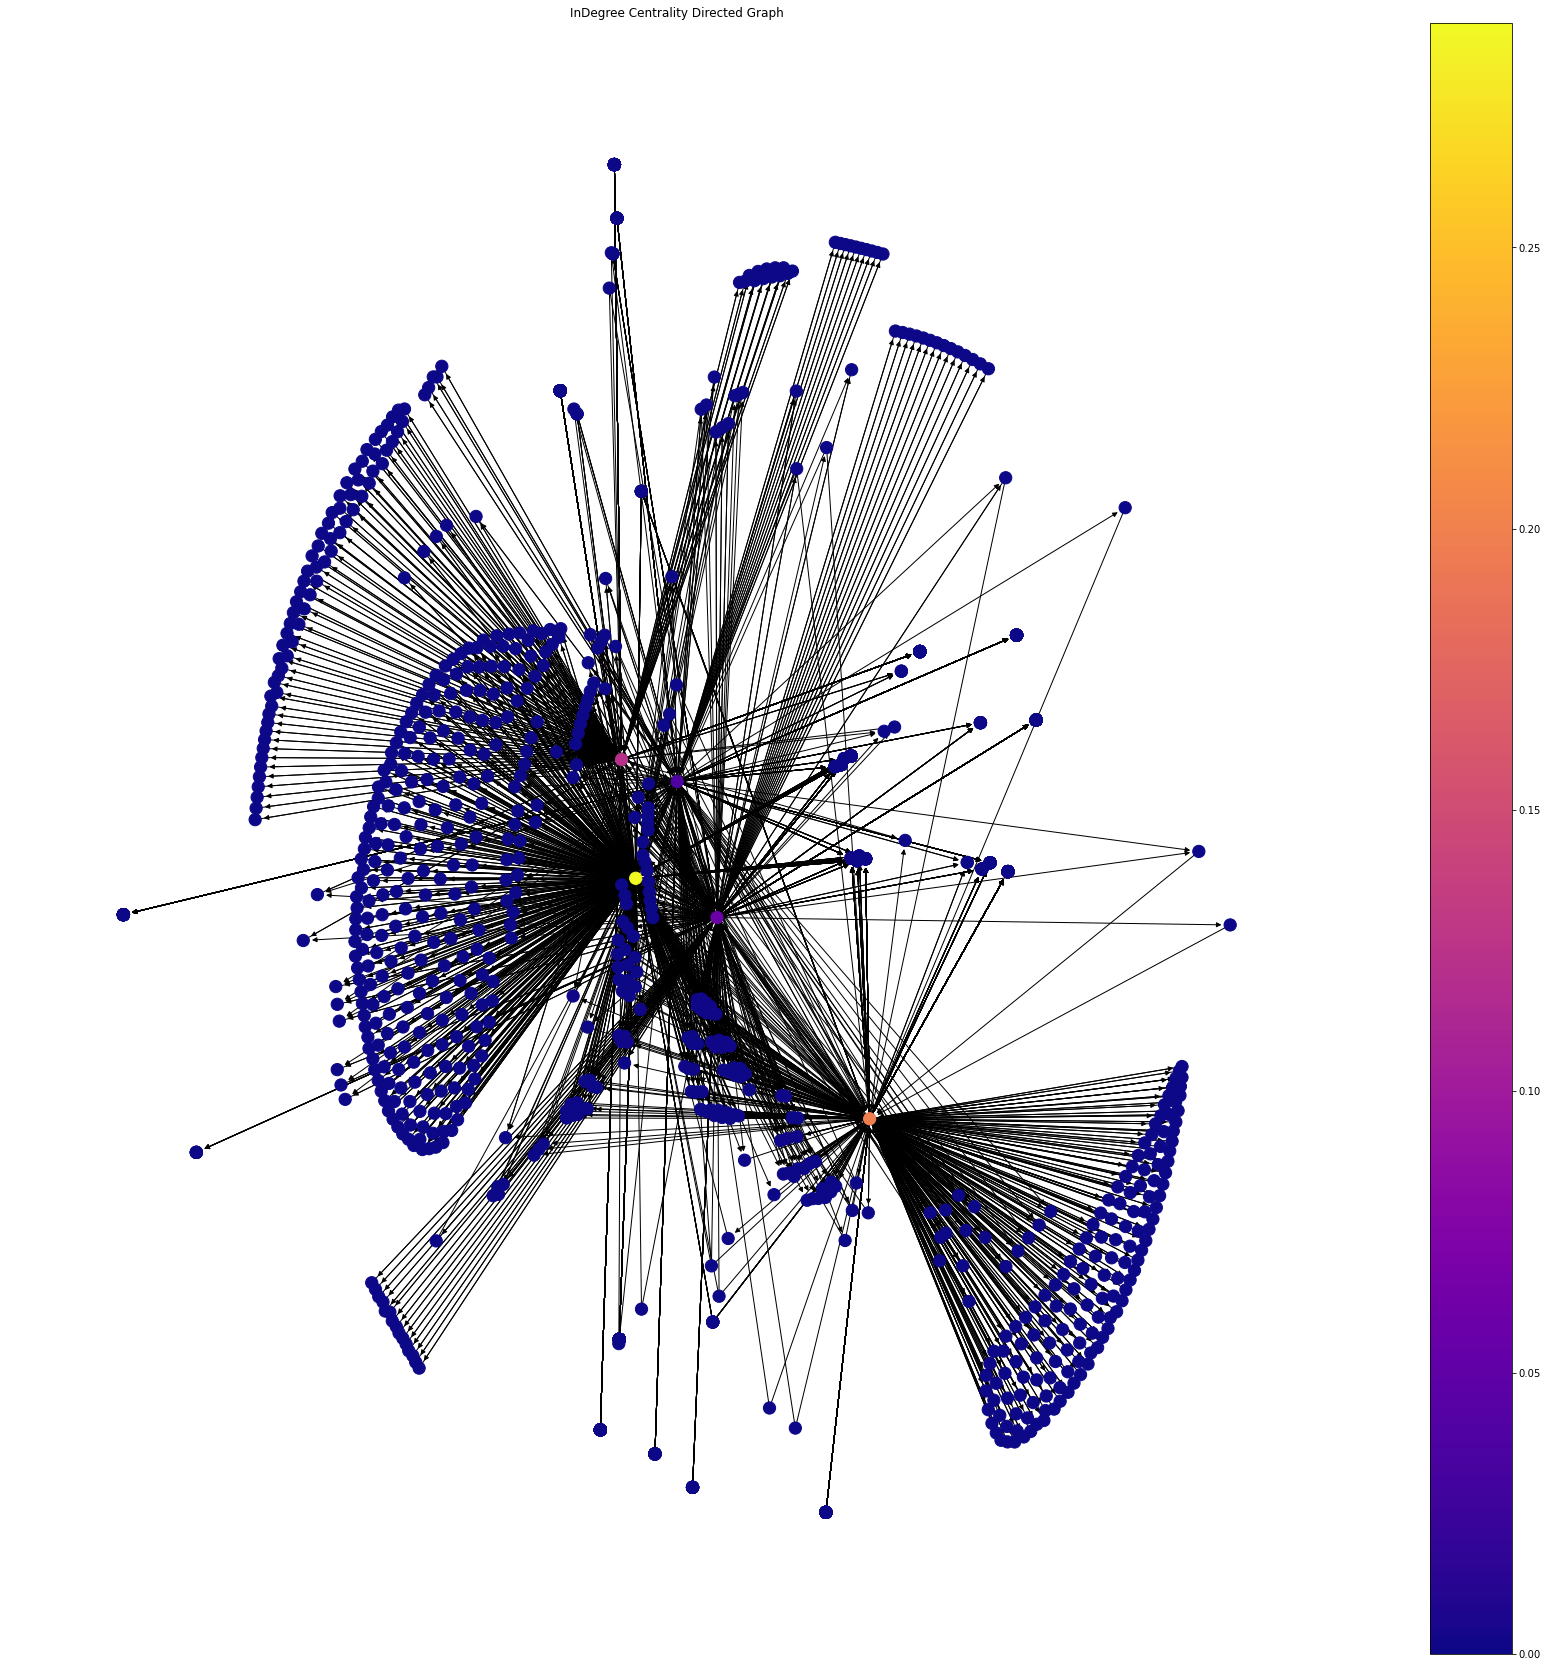

In [75]:
draw(
    complete_graph_no_isolates,
    nx.kamada_kawai_layout(complete_graph_no_isolates),
    data,
    "InDegree Centrality Directed Graph",
    "data/centralities/indegree_centrality_graph.pdf"
)

### 9.5 Out-Degree Centrality

In [76]:
path = "data/centralities/outdegree_centrality.csv"
data = nx.out_degree_centrality(complete_graph_no_isolates)
df = pd.DataFrame(list(data.items()), columns = ['id','Outdegree Centrality'])
df.to_csv(path, index=False)
print(f"Processing Completed and Data Saved")

Processing Completed and Data Saved


In [77]:
df.sort_values("Outdegree Centrality", ascending=False)

id  Outdegree Centrality
1140           132646210              0.309453
28              19659370              0.230059
810             18932422              0.122230
502           3036907250              0.094535
1056            15750573              0.078287
...                  ...                   ...
1956          1175299088              0.000000
1957            14895163              0.000000
1959             5765972              0.000000
1339  984769730983682048              0.000000
1082            50393960              0.000000

[2709 rows x 2 columns]

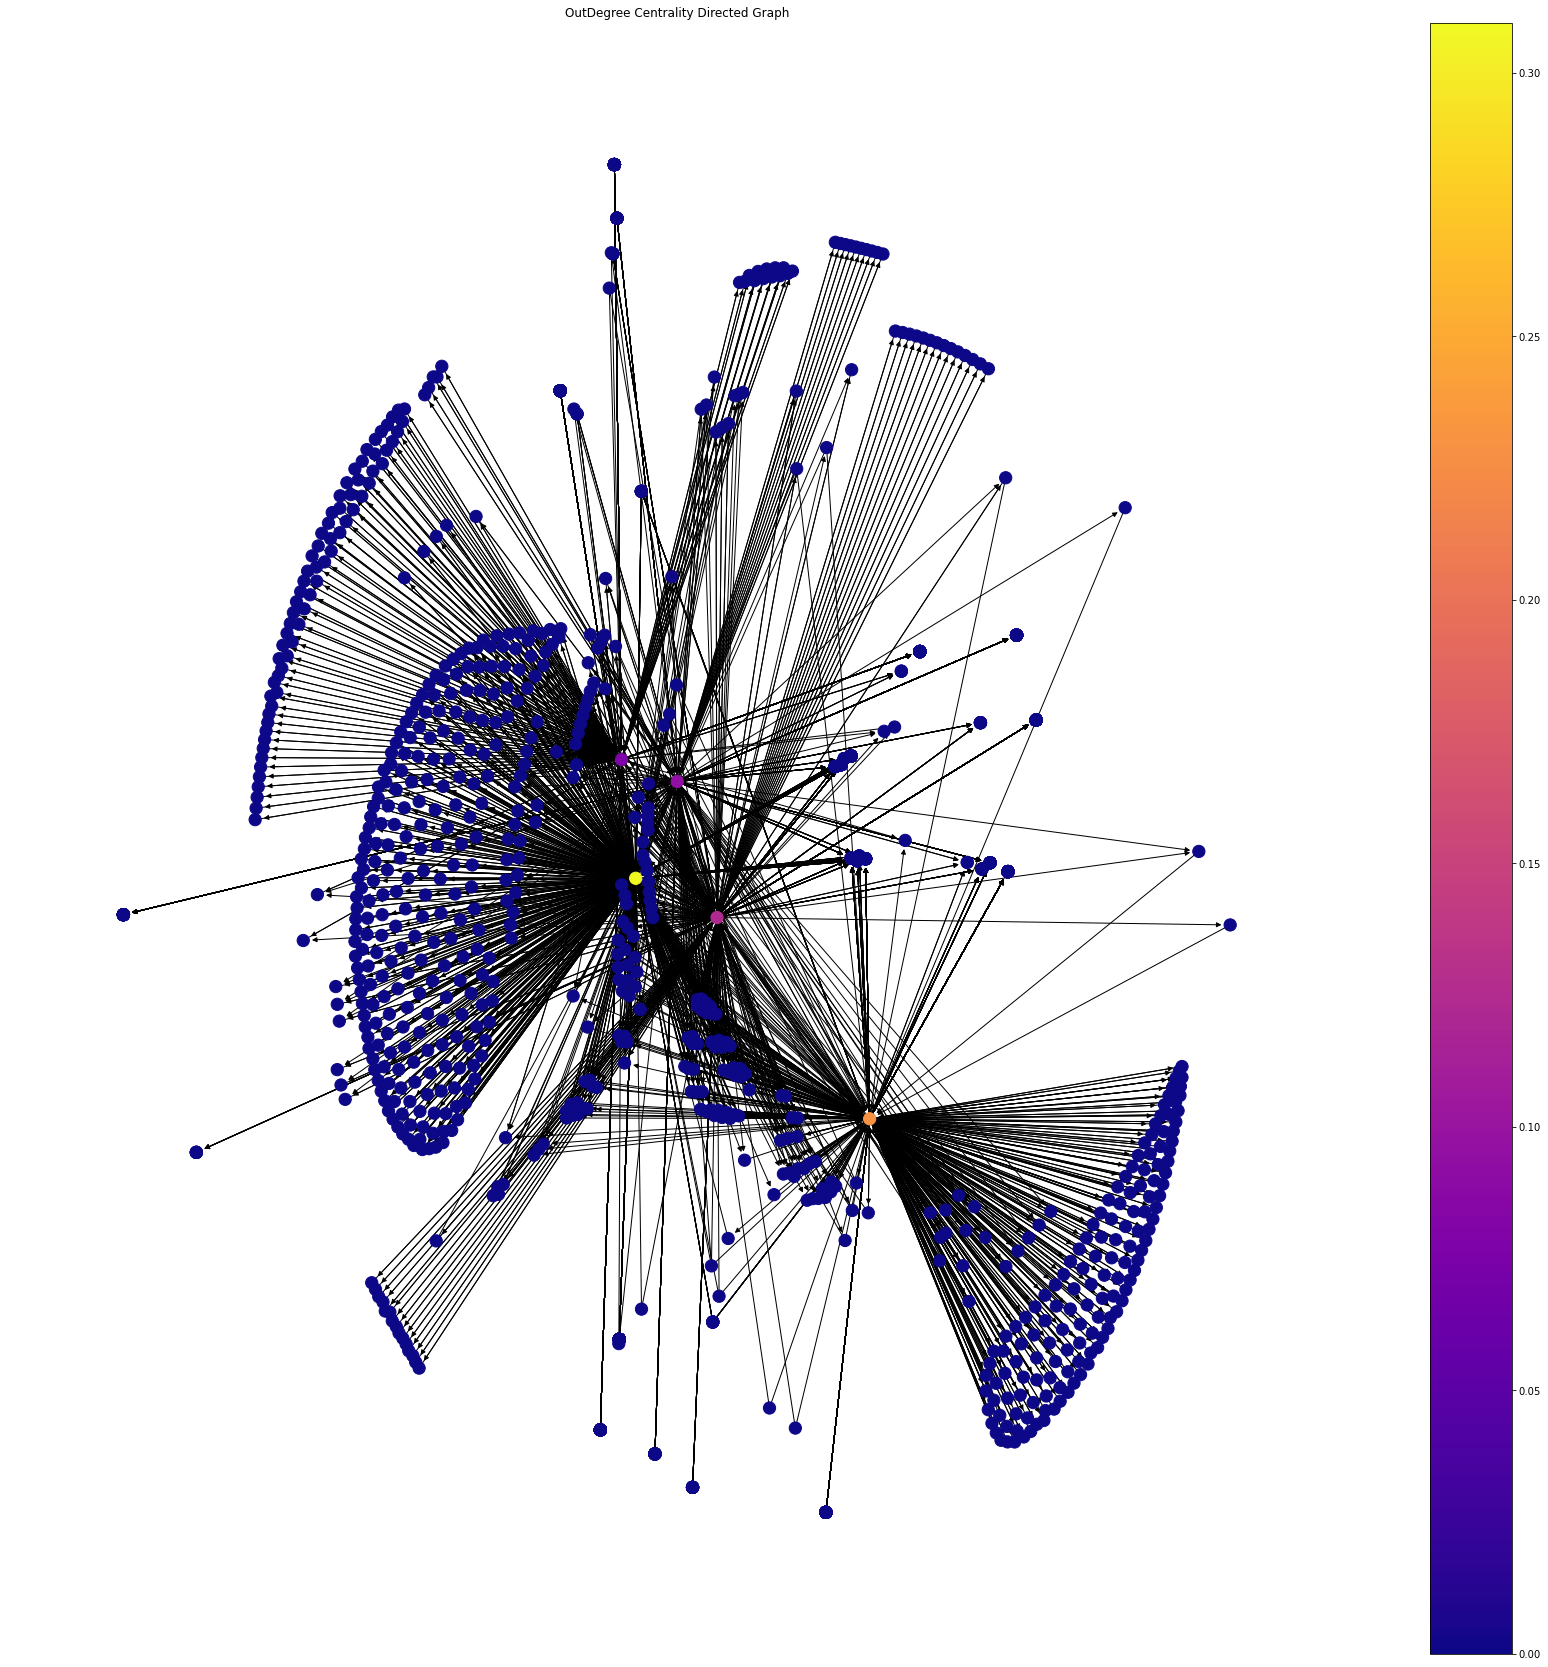

In [78]:
draw(
    complete_graph_no_isolates,
    nx.kamada_kawai_layout(complete_graph_no_isolates),
    nx.out_degree_centrality(complete_graph_no_isolates),
    "OutDegree Centrality Directed Graph",
    "data/centralities/outdegree_centrality_graph.pdf"
)

### 9.6 Page Rank

In [79]:
path = "data/centralities/pagerank.csv"
data = nx.pagerank(complete_graph_no_isolates)
df = pd.DataFrame(list(data.items()), columns = ['id','PageRank'])
df.to_csv(path, index=False)
print(f"Processing Completed and Data Saved")

Processing Completed and Data Saved


In [80]:
df.sort_values("PageRank", ascending=False)

id  PageRank
1140           132646210  0.133992
28              19659370  0.089363
1056            15750573  0.060660
810             18932422  0.023298
502           3036907250  0.013403
...                  ...       ...
814             39112661  0.000151
1868           108207407  0.000151
1869            14957053  0.000151
1871  866900373302378503  0.000151
2708          2269512362  0.000151

[2709 rows x 2 columns]

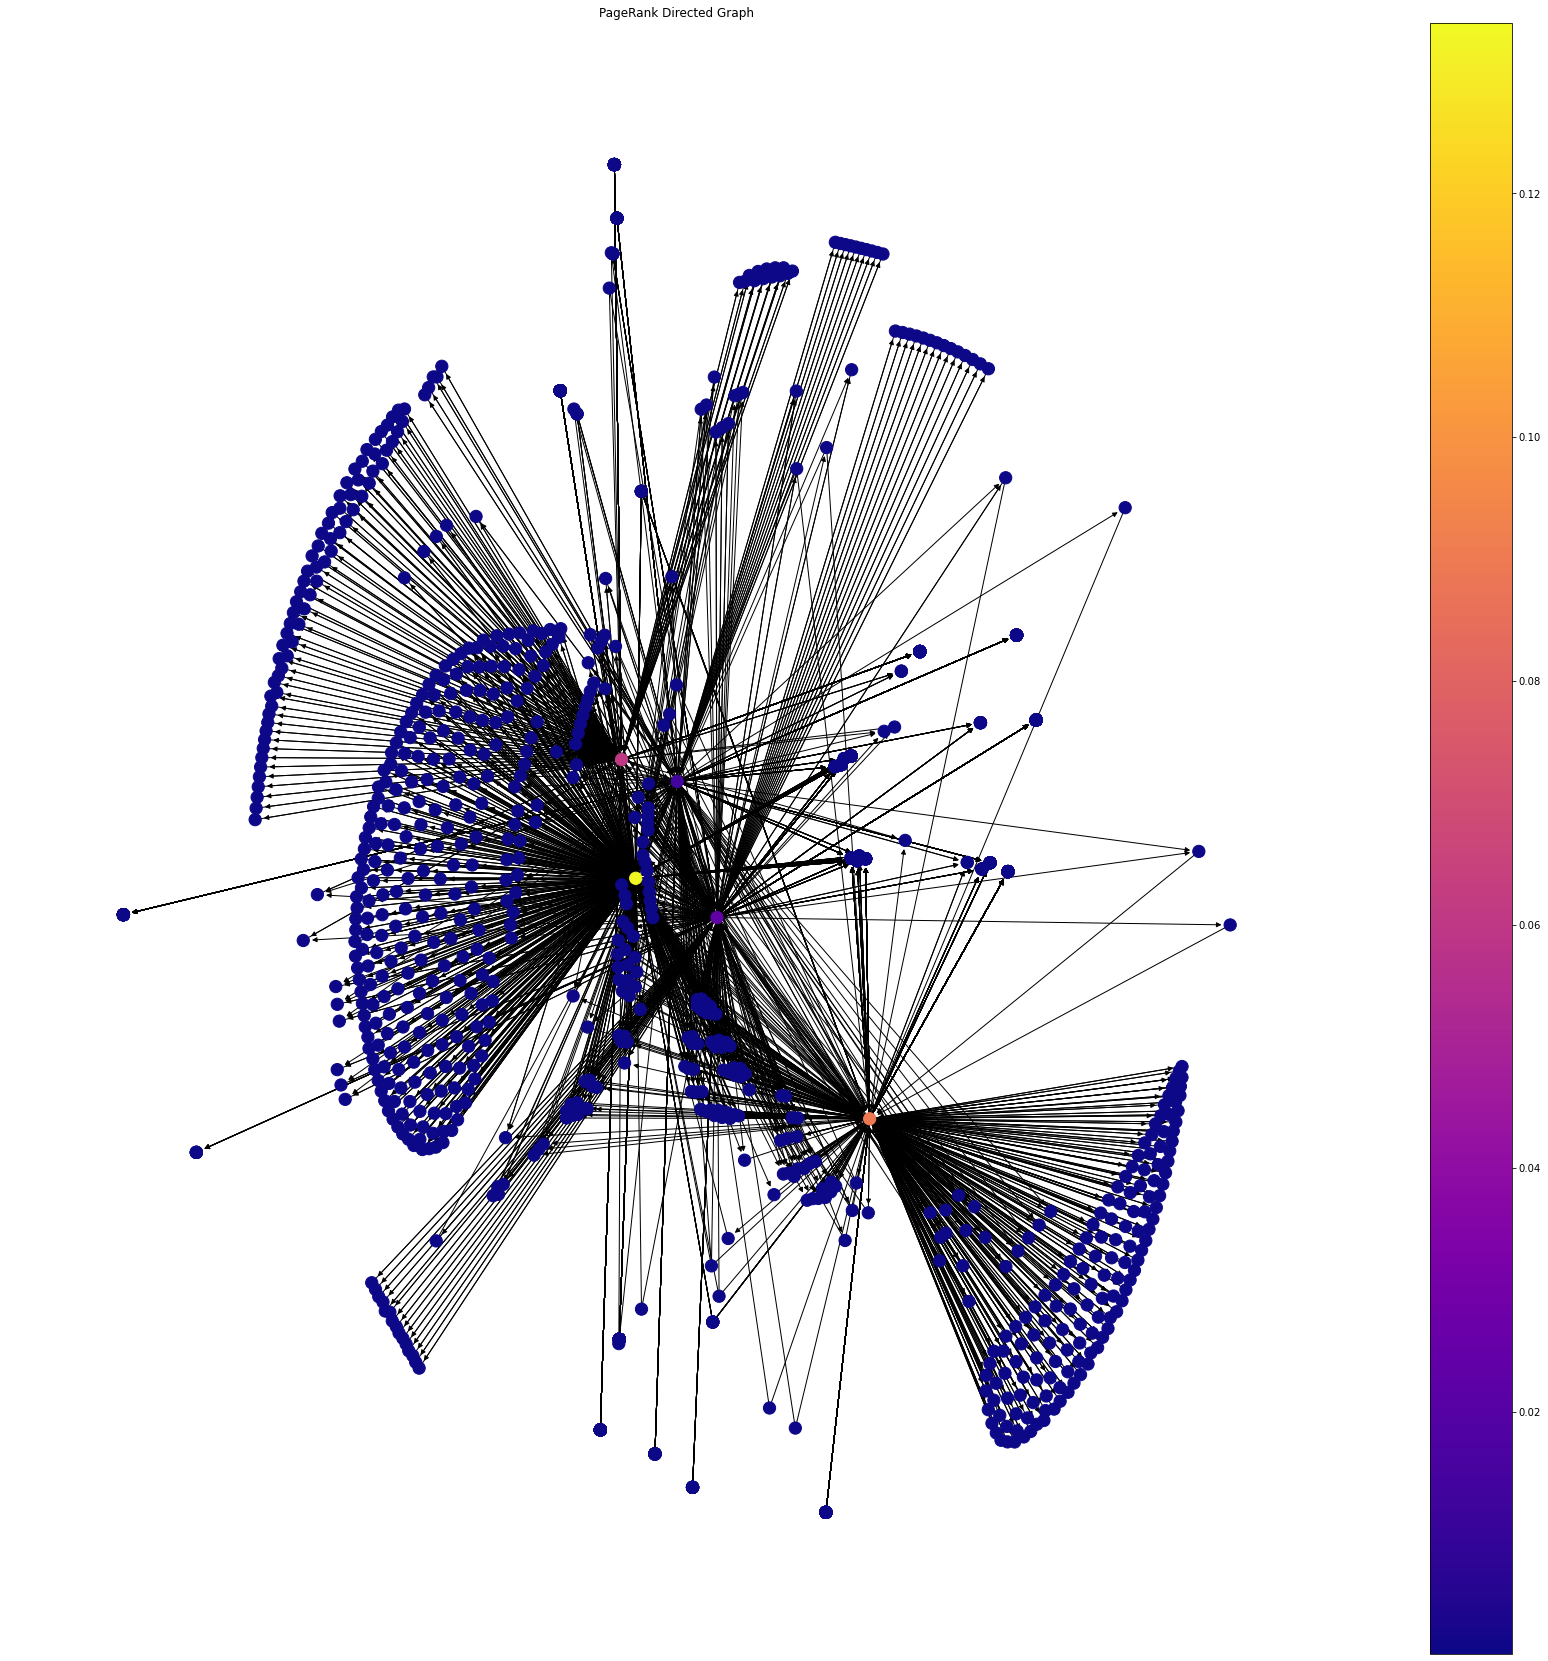

In [81]:
draw(
    complete_graph_no_isolates,
    nx.kamada_kawai_layout(complete_graph_no_isolates),
    data,
    "PageRank Directed Graph",
    "data/centralities/pagerank_graph.pdf"
)

### 9.7 HITS

In [82]:
path1 = "data/centralities/hits_hubs.csv"
path2 = "data/centralities/hits_authorities.csv"
hubs, authorities = nx.hits(complete_graph_no_isolates, max_iter = 200, normalized = True)
df1 = pd.DataFrame(list(hubs.items()), columns = ['id','HITS Hubs'])
df1.to_csv(path1, index=False)
df2 = pd.DataFrame(list(authorities.items()), columns = ['id','HITS Authorities'])
df2.to_csv(path2, index=False)
#print("Hub Scores: ", hubs)
#print("Authority Scores: ", authorities)
print(f"Processing Completed and Data Saved")

Processing Completed and Data Saved


In [83]:
df1.sort_values("HITS Hubs", ascending=False)

id  HITS Hubs
1140   132646210   0.073071
28      19659370   0.039726
810     18932422   0.027322
502   3036907250   0.018056
1056    15750573   0.002305
...          ...        ...
1767   346742249   0.000000
278     29735775   0.000000
279   2303160649   0.000000
280    891731882   0.000000
1678   172260408   0.000000

[2709 rows x 2 columns]

In [84]:
df2.sort_values("HITS Authorities", ascending=False)

id  HITS Authorities
1140           132646210          0.006591
28              19659370          0.004249
810             18932422          0.002402
2109  799830497065050112          0.001562
128            119512412          0.001562
...                  ...               ...
684            153506820          0.000000
1788  801372548940398593          0.000000
1787            17278474          0.000000
686   803909558431313920          0.000000
2708          2269512362          0.000000

[2709 rows x 2 columns]

Hubs

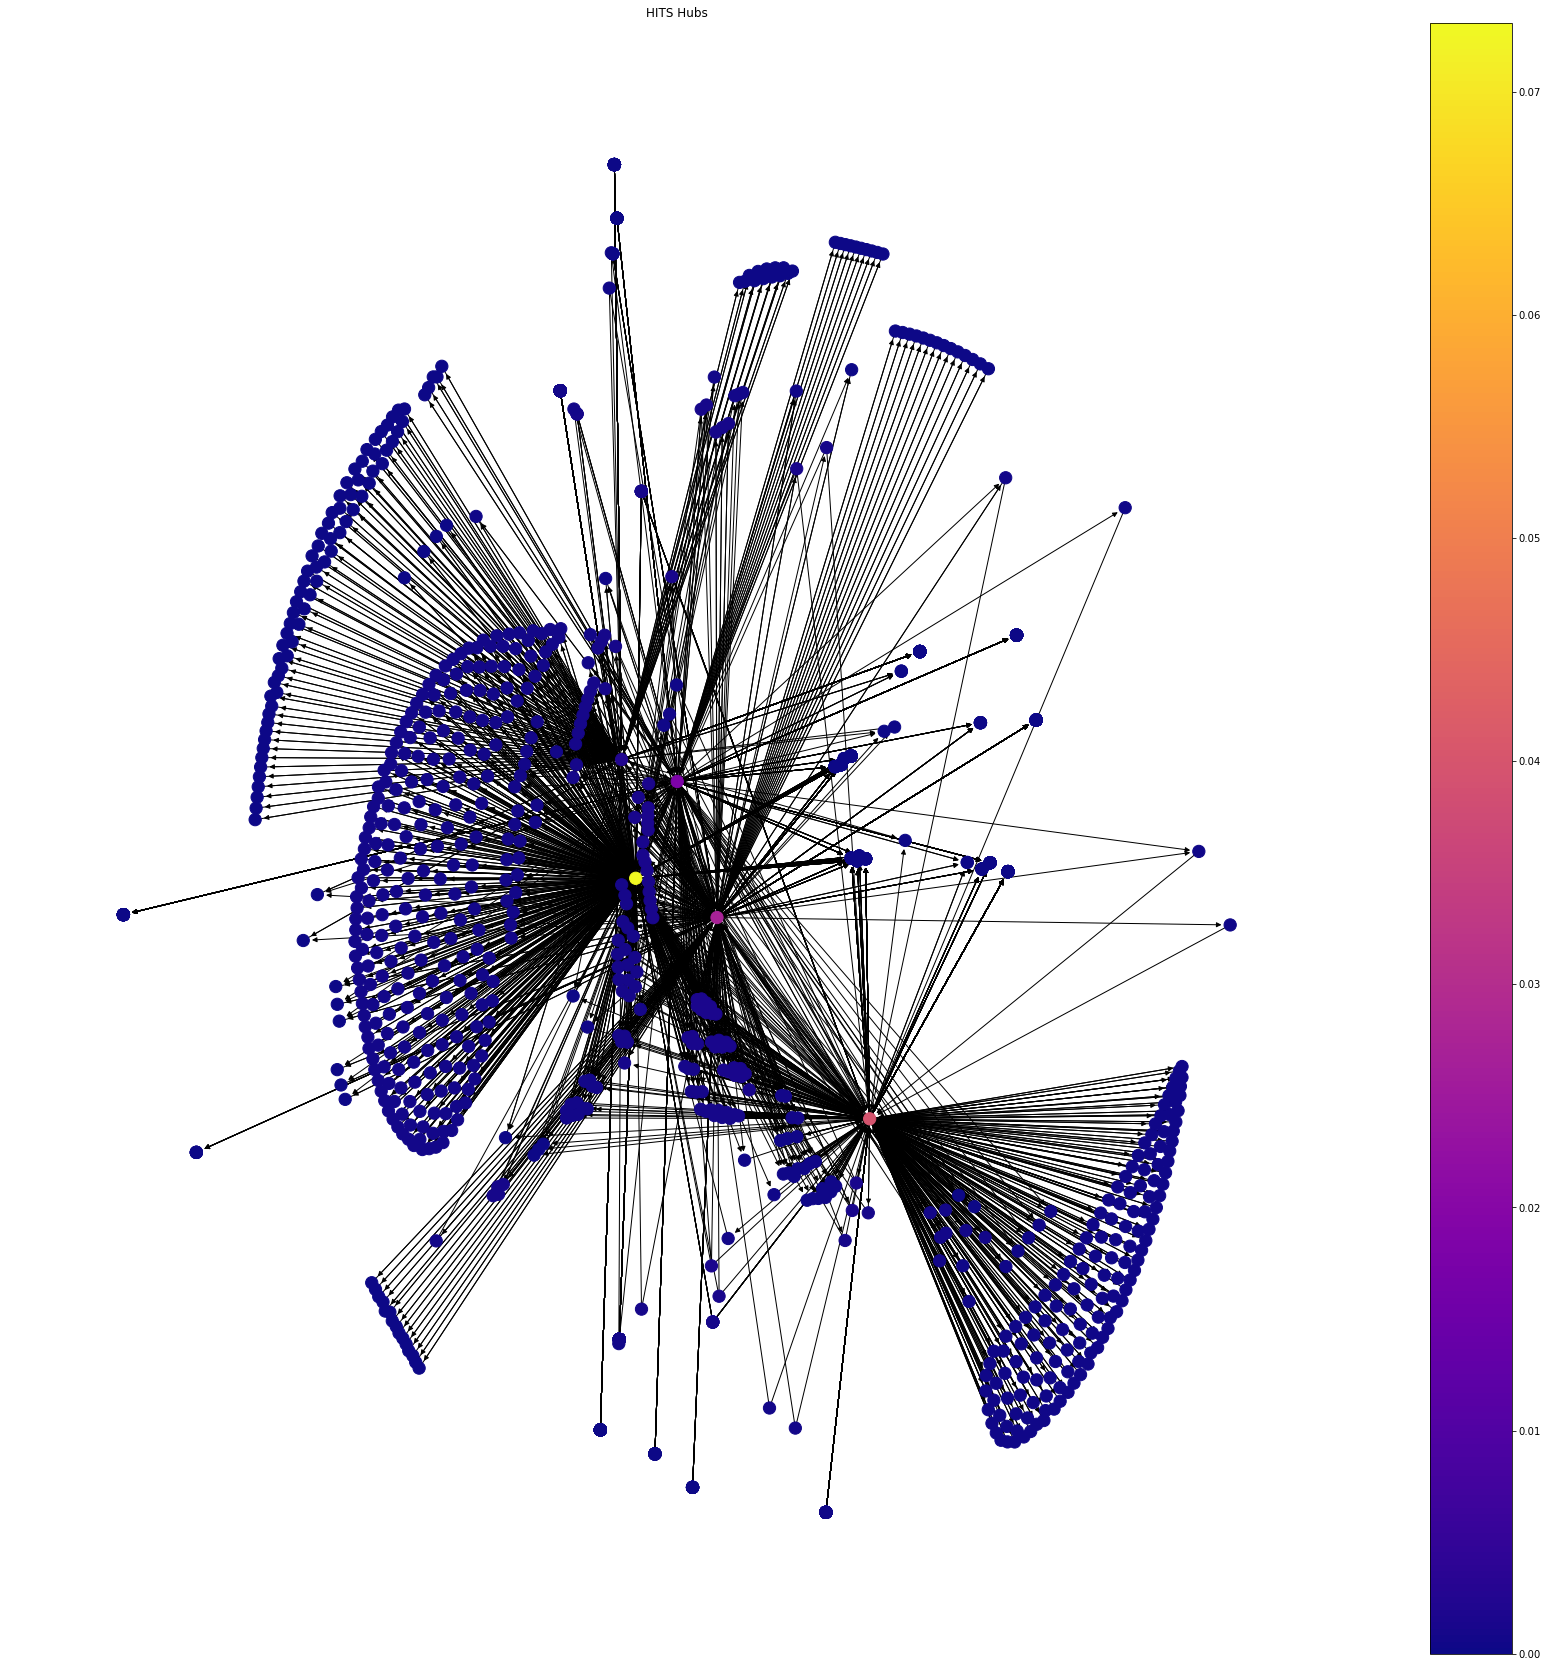

In [85]:
draw(
    complete_graph_no_isolates,
    nx.kamada_kawai_layout(complete_graph_no_isolates),
    hubs,
    "HITS Hubs",
    "data/centralities/hits_hubs_graph.pdf"
)

Authorities

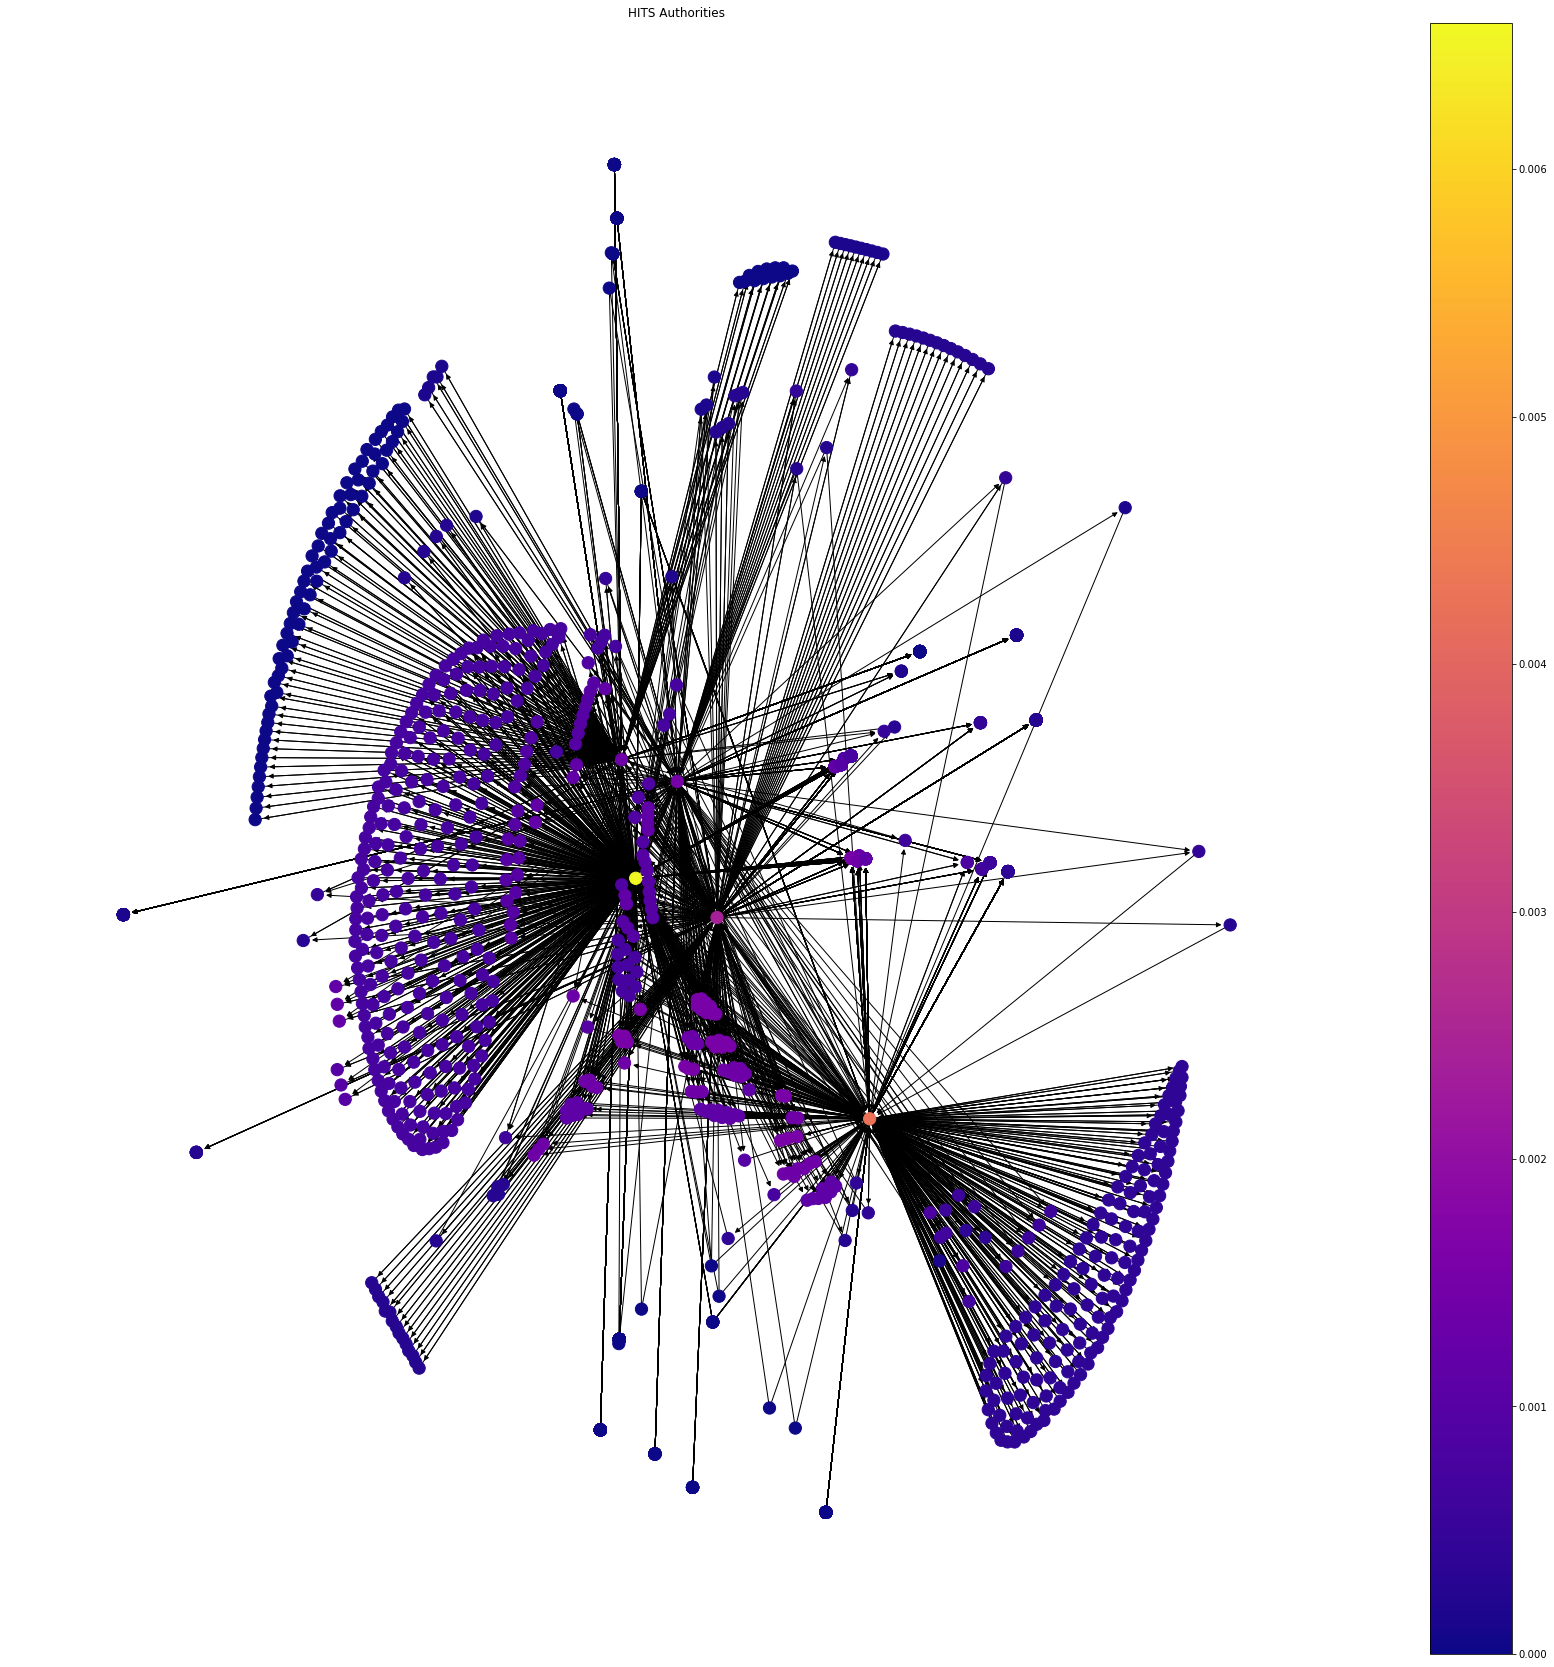

In [86]:
draw(
    complete_graph_no_isolates,
    nx.kamada_kawai_layout(complete_graph_no_isolates),
    authorities,
    "HITS Authorities",
    "data/centralities/hits_authorities_graph.pdf"
)

## 10. Cricca del Sottografo
Generazione del sottografo indotto dal nodo KevinRoitero (ego_graph) e:
- Cricca massima (max_clique)
- Dimensione della cricca massima (large_clique_size)

Le funzioni precedenti hanno bisogno di un grafo non orientato come input. 

### 10.1 Sottografo

Generazione del sottografo, trasformazione in indiretto e rimozione dei nodi isolati (non dovrebbero essercene con reciprocal = False)

In [66]:
complete_graph = nx.read_gpickle("data/graphs/complete_graph_no_isolates.pkl")
node = int(account_to_analyze_id[4])
subgraph = nx.ego_graph(complete_graph, node).to_undirected(reciprocal=False)
subgraph = removeIsolates(subgraph)
nx.write_gpickle(subgraph, "data/graphs/subgraph.pkl")

In [67]:
subgraph = nx.read_gpickle("data/graphs/subgraph.pkl")

print(f"Number of nodes: {subgraph.number_of_nodes()}")
print(f"Number of edges: {subgraph.number_of_edges()}")

drawGraphPyvis(subgraph, "data/graphs/subgraph.html", "Complete Directed Subgraph")

Number of nodes: 257
Number of edges: 554


### 10.2 Cricca Massima

In [68]:
subgraph = nx.read_gpickle("data/graphs/subgraph.pkl")

In [69]:
max_cl = clique.max_clique(subgraph)

In [70]:
print(f"Max Clique: {max_cl}")

Max Clique: {132646210, 3036907250, 19659370, 18932422}


### 10.3 Dimensione Cricca Massima

In [71]:
subgraph = nx.read_gpickle("data/graphs/subgraph.pkl")
large_cl_size = clique.large_clique_size(subgraph)
print(f"Max Clique Size: {large_cl_size}")

Max Clique Size: 5


## 11. Copertura Minima degli archi 
Copertura minima degli archi (min_edge_cover) del grafo

Funziona solo per i grafi indiretti

In [15]:
complete_undirected_graph = nx.read_gpickle("data/graphs/complete_undirected_graph.pkl")
min_edge_cover = nx.min_edge_cover(complete_undirected_graph)
serialize_json(data_folder, "graphs/min_edge_cover.json", list(min_edge_cover))

Data serialized to path: data/graphs/min_edge_cover.json


## 12. Small-Worldness
Per stimare la small-worldness del grafo indiretto si calcolano i seguenti coefficienti:
- Coefficiente omega (omega)
- Coefficiente sigma (sigma)

### 12.1 Omega

Il coefficiente omega varia tra -1 ed 1. 
- Valori vicini allo 0 -> Small-Worldness
- Valori vicini a -1 -> Grafo Reticolare
- Valori vicino ad 1 -> Grafo Random

In [123]:
complete_undirected_graph = nx.read_gpickle("data/graphs/complete_undirected_graph.pkl")
omega = nx.omega(complete_undirected_graph, 5, 2)
print(f"Small Worldness Omega: {omega}")

Small Worldness Omega: 0.0017481178052002333


### 12.2 Sigma

Un grafo si può definire small-world se il coefficiente sigma è un valore > 1.


In [4]:
complete_undirected_graph = nx.read_gpickle("data/graphs/complete_undirected_graph.pkl")
sigma = nx.sigma(complete_undirected_graph, 5, 2)
print(f"Small Worldness Sigma: {sigma}")

Small Worldness Sigma: 0.9838924363249952


## 13. Correlazioni
Correlazione di Pearson Rho e di Kendall Tau fra le misure di centralità.

### 13.1 Unione DataFrame Misure Centralità

Unione dei dataframe con i dati delle centralità calcolate in precedenza.

In [73]:
names = ["betweenness_centrality" , "closeness_centrality", "degree_centrality", "indegree_centrality", "outdegree_centrality", "pagerank", "hits_hubs", "hits_authorities"]
dfs = []

#salvataggio path dei dataframe
for x in names:
    dfs.append(pd.read_csv("data/centralities/"+x+".csv"))

#merge dei primi due
final_df=pd.merge(dfs[0], dfs[1], on='id', how='outer')

#merge dei restanti
for x in range(2,(len(dfs))):
    final_df=pd.merge(final_df, dfs[x], on='id', how='outer')

#salvtaggio dataframe finale
final_df.to_csv("data/final_centrality.csv", index=False)
final_df.head()

id  Betweenness Centrality  Closeness Centrality  \
0    27493489                     0.0              0.230831   
1   551951577                     0.0              0.244290   
2  4873684235                     0.0              0.000000   
3   228130177                     0.0              0.199817   
4  1894582058                     0.0              0.000000   

   Degree Centrality  Indegree Centrality  Outdegree Centrality  PageRank  \
0           0.000739             0.000369              0.000369  0.000273   
1           0.001108             0.000369              0.000739  0.000287   
2           0.000369             0.000000              0.000369  0.000151   
3           0.000369             0.000369              0.000000  0.000394   
4           0.000369             0.000000              0.000369  0.000151   

   HITS Hubs  HITS Authorities  
0   0.000425          0.000392  
1   0.000898          0.000722  
2   0.000658          0.000000  
3   0.000000          0.000023  
4   0.000425          0.000000

Rimozione colonna ID

In [74]:
final_df.drop(columns=["id"]).to_csv("data/final_centrality_no_ids.csv", index = False)

### 13.2 Correlazione di Pearson Rho

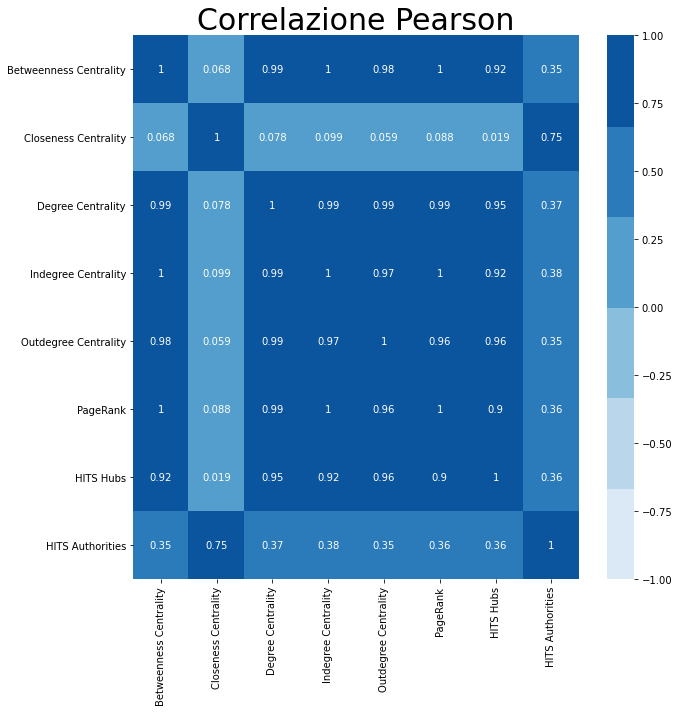

In [77]:
df = pd.read_csv("data/final_centrality_no_ids.csv")
corr = df.corr(method="pearson")
rcParams['figure.figsize'] = 10, 10
color = sn.color_palette("Blues")
sn.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap=color)
plt.title("Correlazione Pearson", fontsize=30)
plt.savefig("data/correlation/pearson.pdf")
plt.show()

### 13.3 Correlazione di Kendall Tau

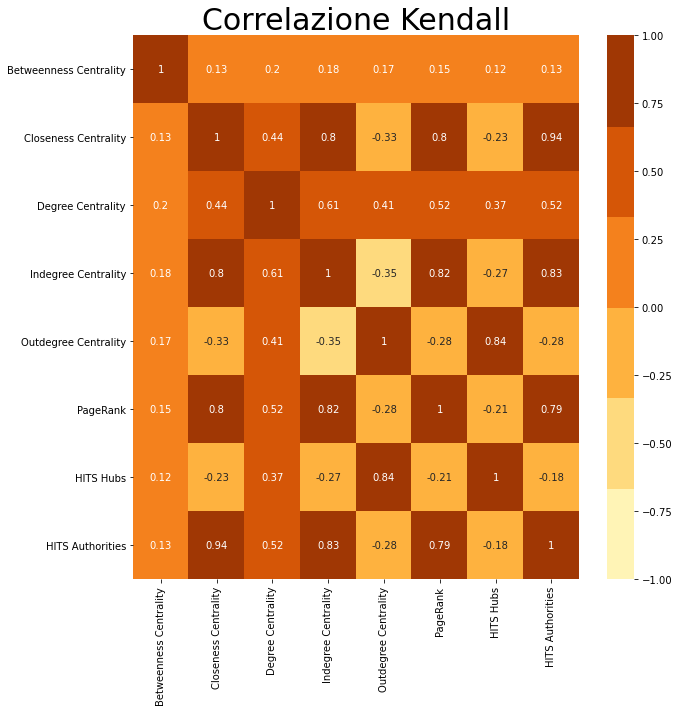

In [78]:
df = pd.read_csv("data/final_centrality_no_ids.csv")
corr = df.corr(method="kendall")
rcParams['figure.figsize'] = 10, 10
color = sn.color_palette("YlOrBr")
sn.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap = color)
plt.title("Correlazione Kendall", fontsize=30)
plt.savefig("data/correlation/kendall.pdf")
plt.show()